In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px
import matplotlib.pyplot as plt


## 1. EDA and LAG analysis on total data

In [2]:
root_csv = 'Diabetes//csv files/'
root_pickle = 'Diabetes/pickle files/'
df_diab_mean_pivot = pd.read_pickle(root_pickle +'Diabetes_Mean_Total_Pivot.pkl')
df_diab_mean_pivot.head(5)



Total Absolute  Total Percentage  Grocery Tax  Restaurant Tax  \
State                                                                       
Alabama           470221.0         12.508955      0.04000          0.0400   
Alaska             42967.0          8.906667      0.00000          0.0000   
Arizona           545978.0         11.166667      0.00000          0.0560   
Arkansas          256151.0         11.662667      0.00125          0.0650   
California       2733304.0          9.134483      0.00000          0.0725   

            tax_delta    Population    Year  
State                                        
Alabama       0.00000  3.711098e+06  2020.0  
Alaska        0.00000  5.349532e+05  2020.0  
Arizona       0.05600  5.584050e+06  2020.0  
Arkansas      0.06375  2.255689e+06  2020.0  
California    0.07250  2.957682e+07  2020.0

In [3]:
# st_df = df_diab_mean_pivot[df_diab_mean_pivot.index=='North Carolina']

In [4]:
states=df_diab_mean_pivot.index.unique()

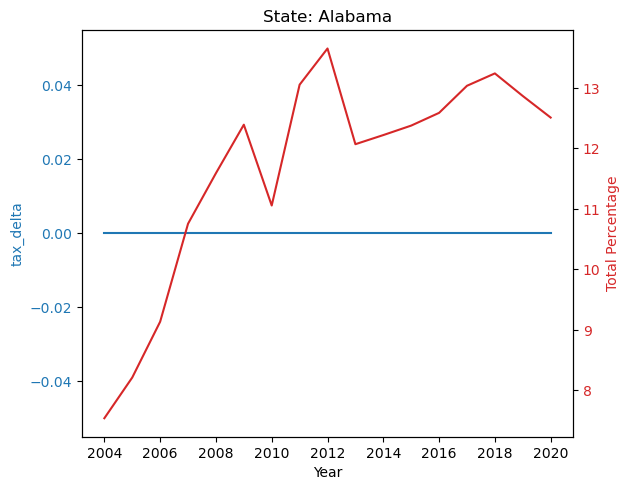

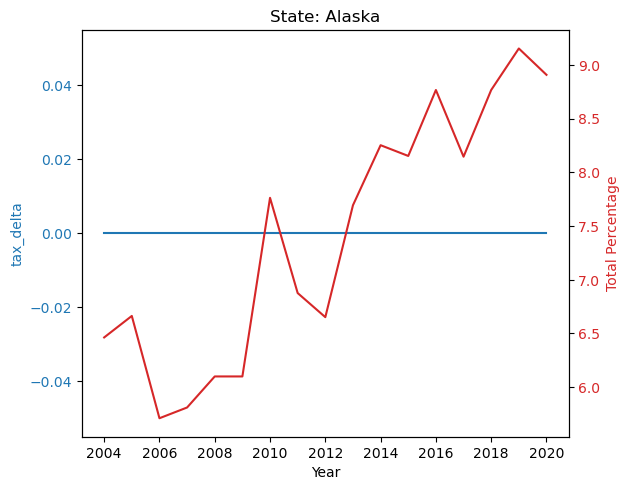

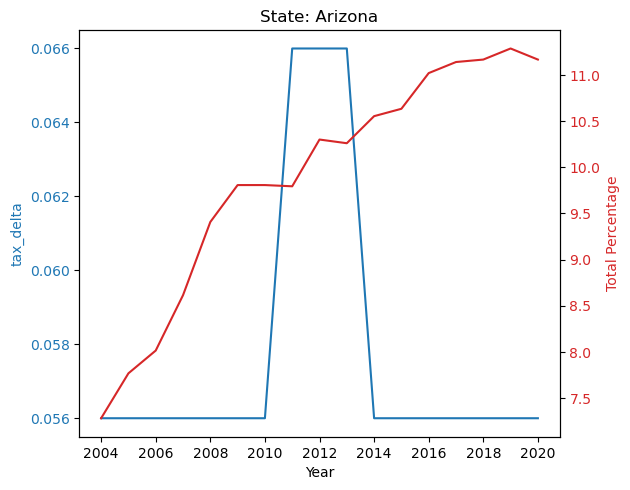

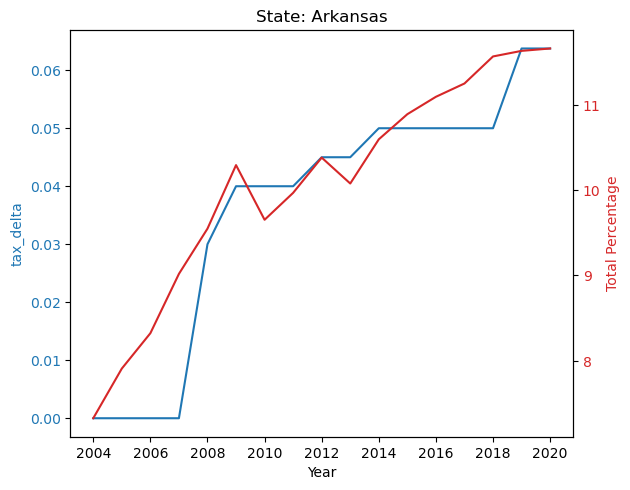

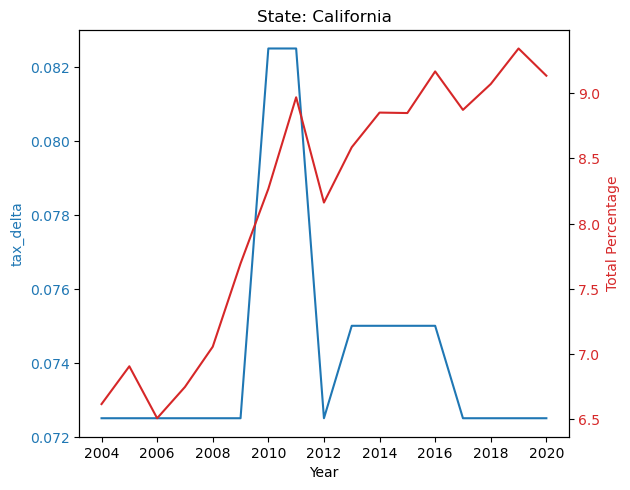

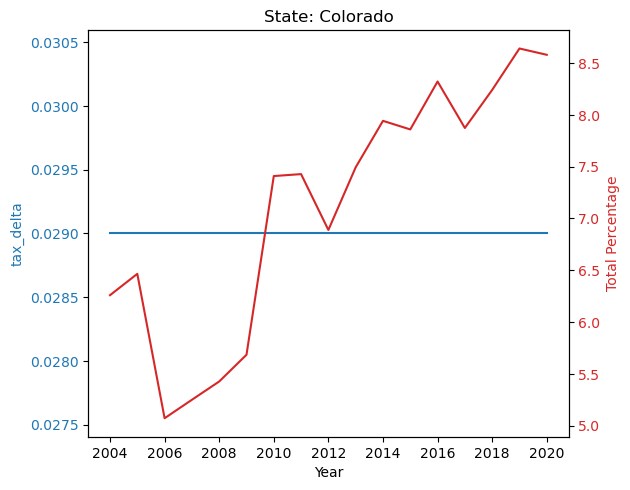

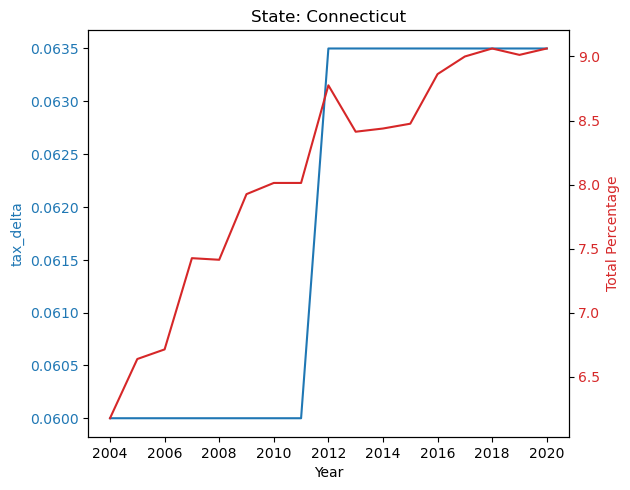

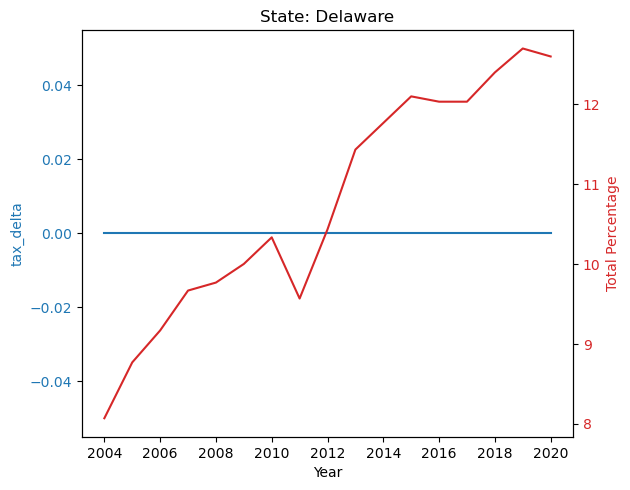

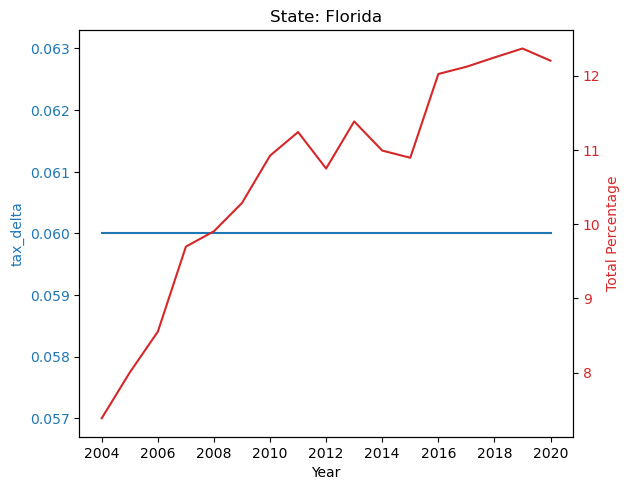

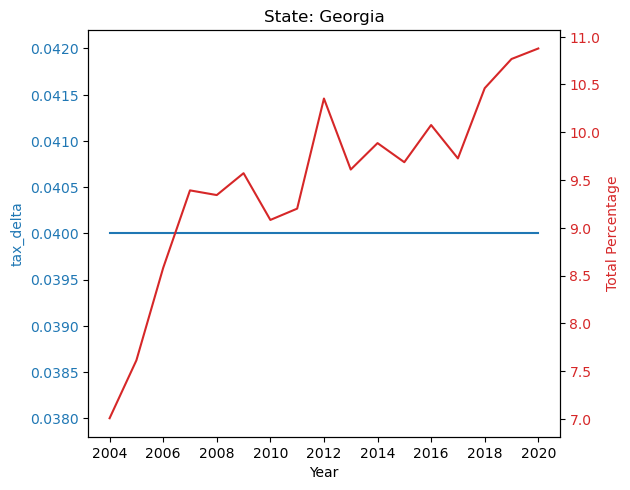

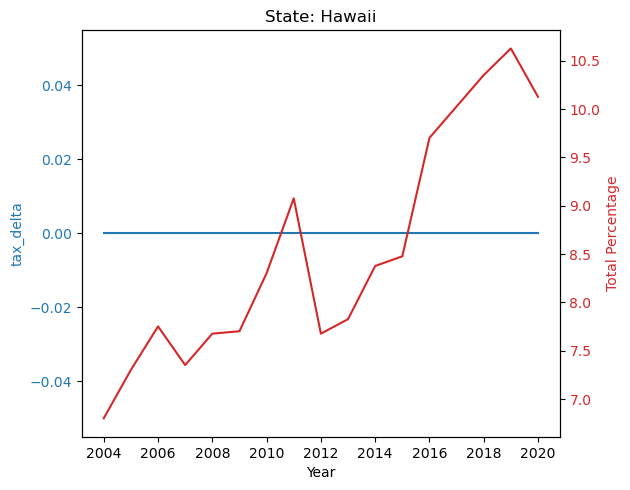

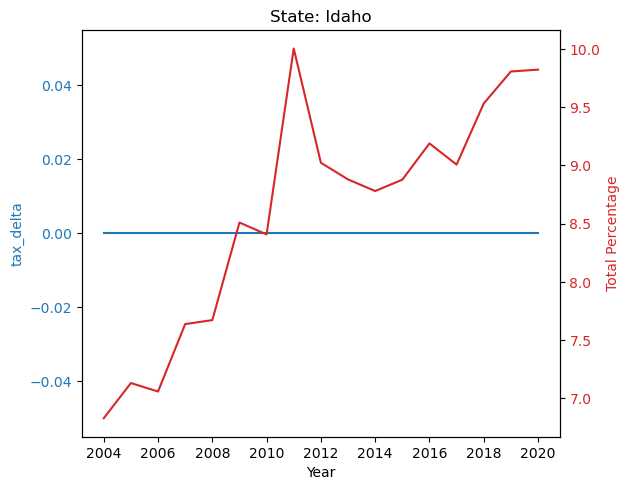

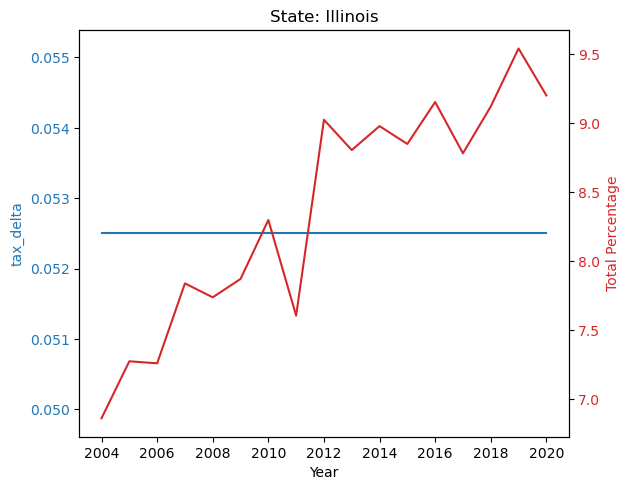

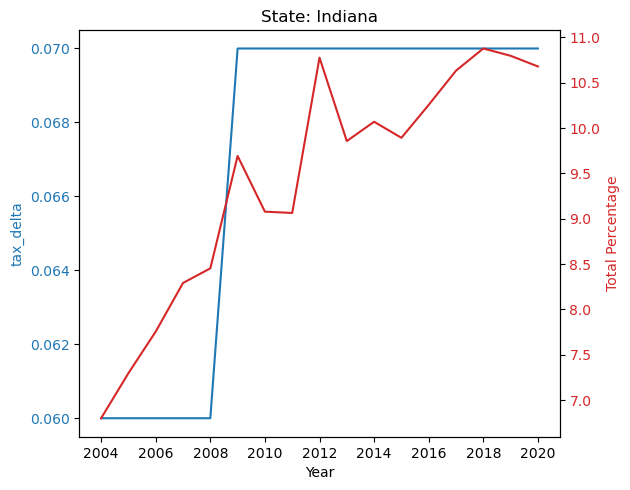

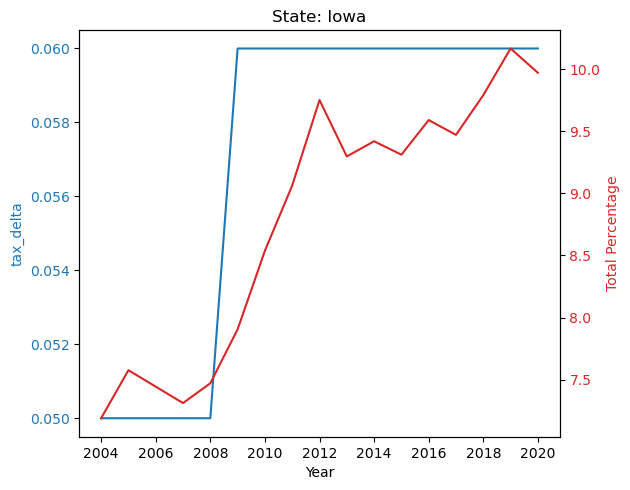

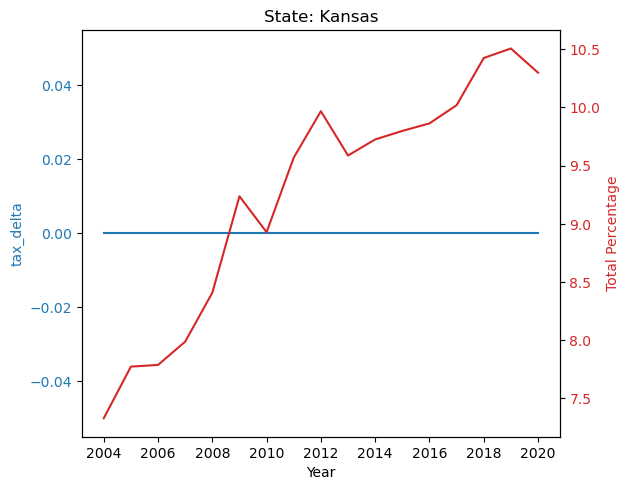

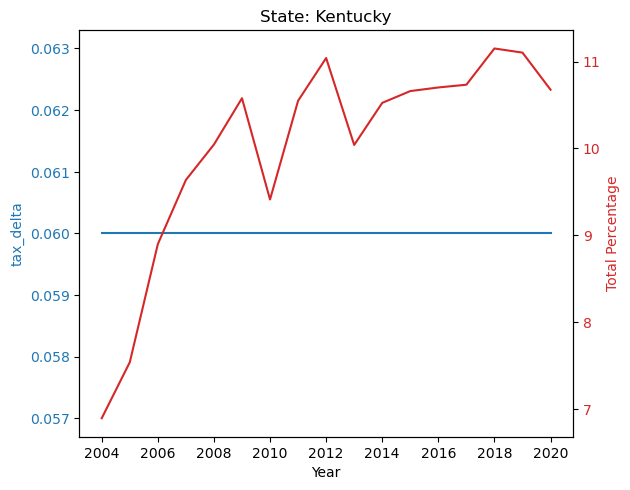

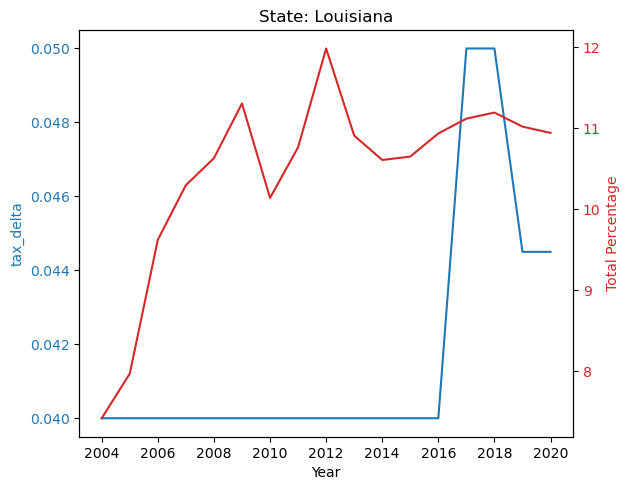

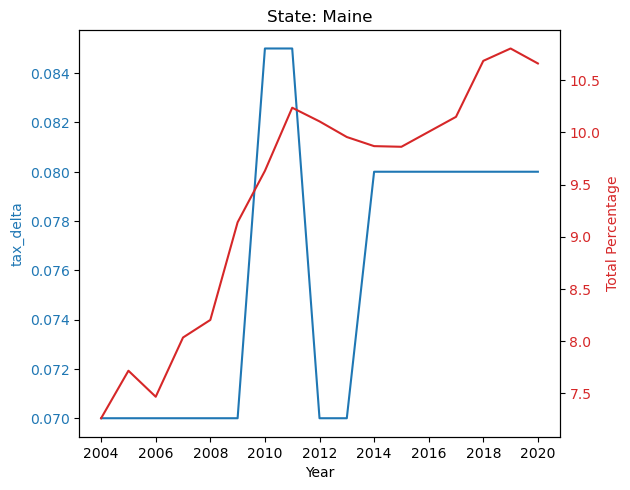

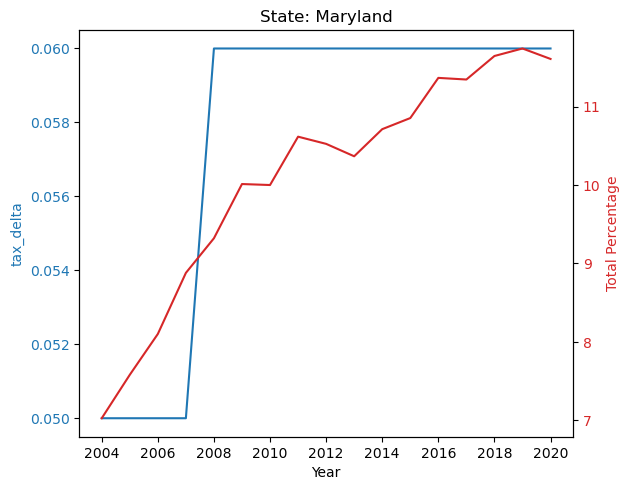

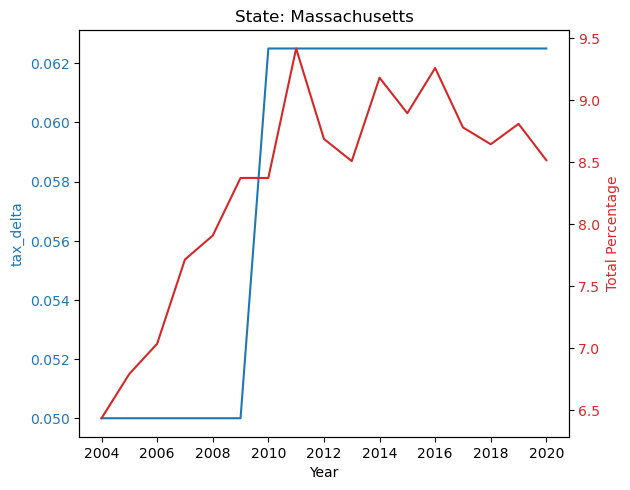

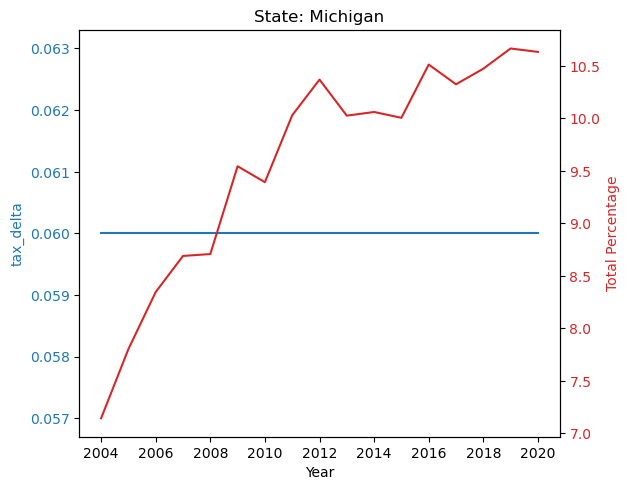

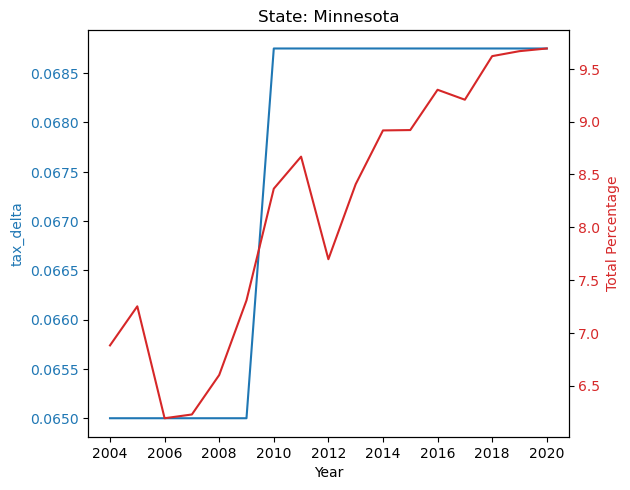

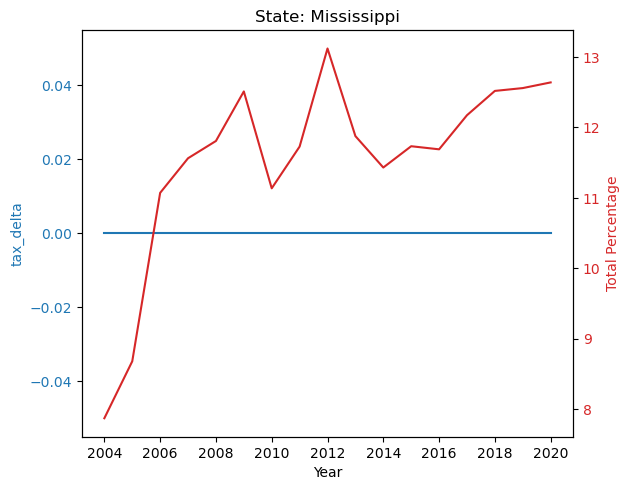

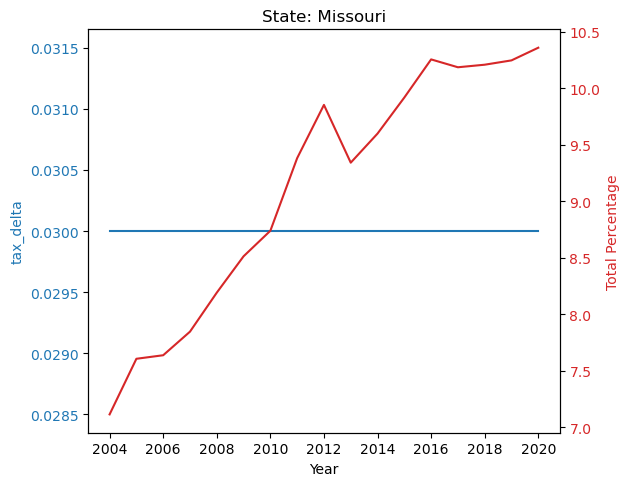

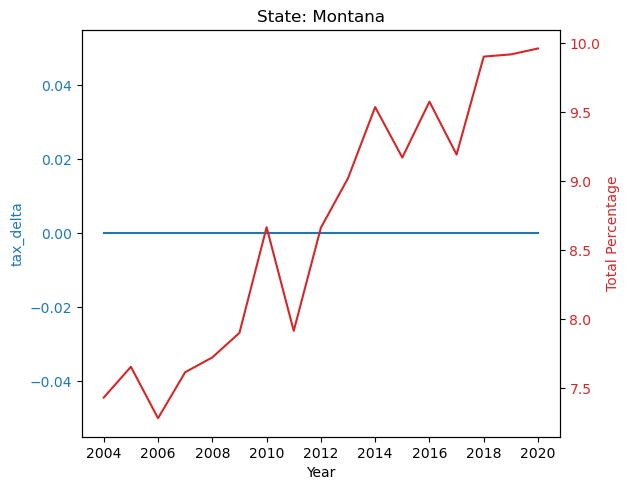

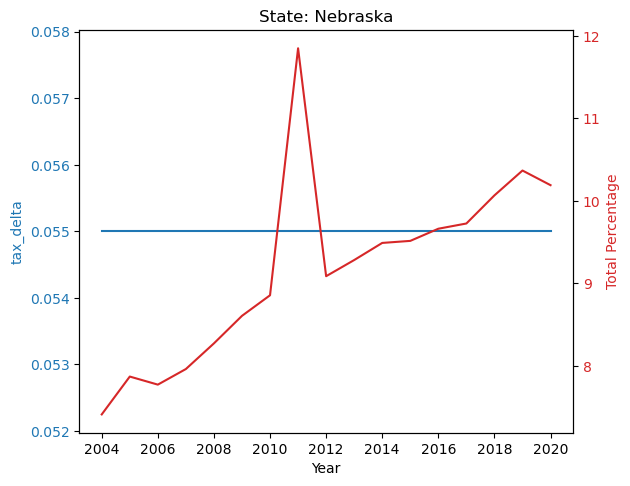

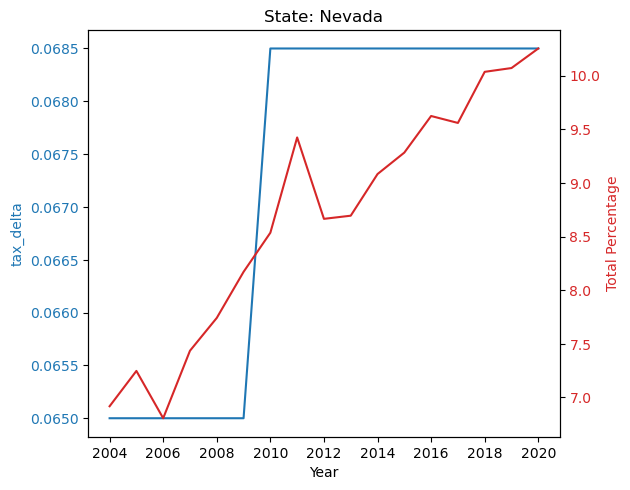

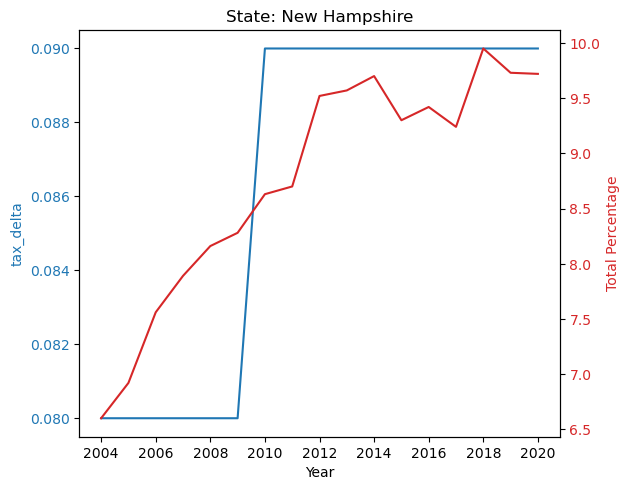

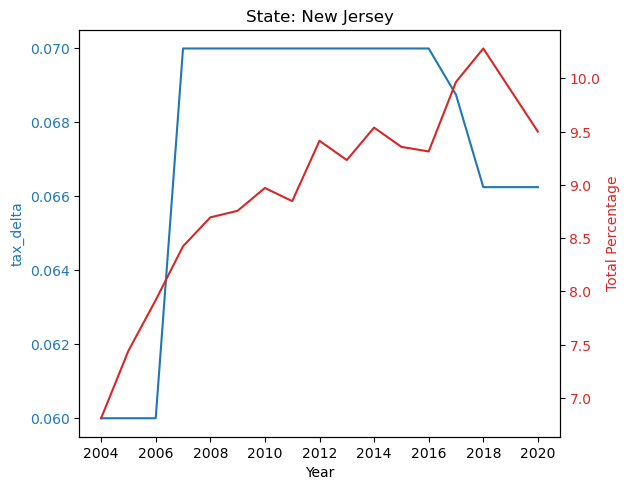

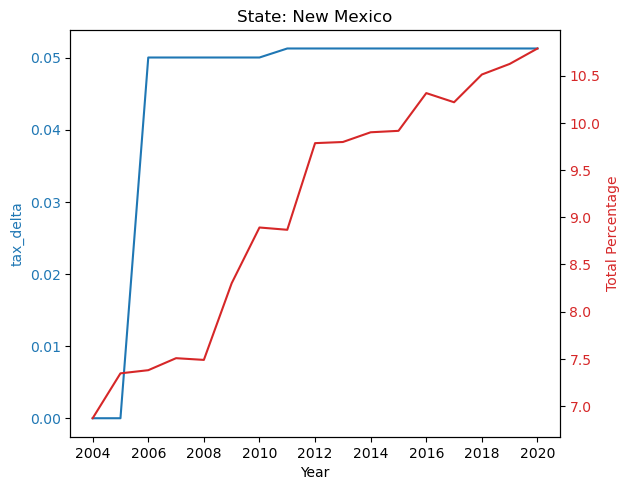

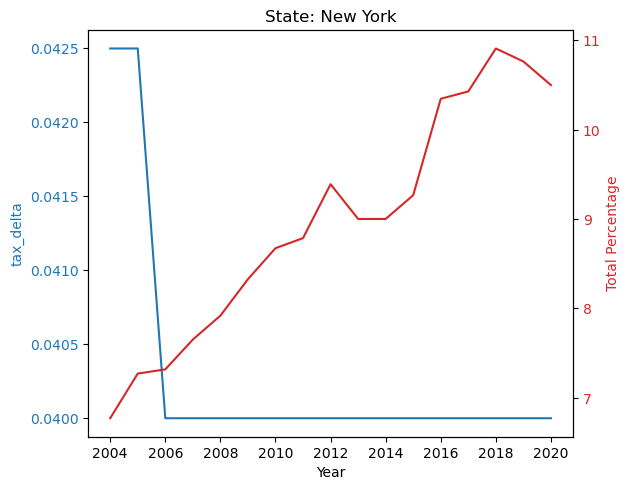

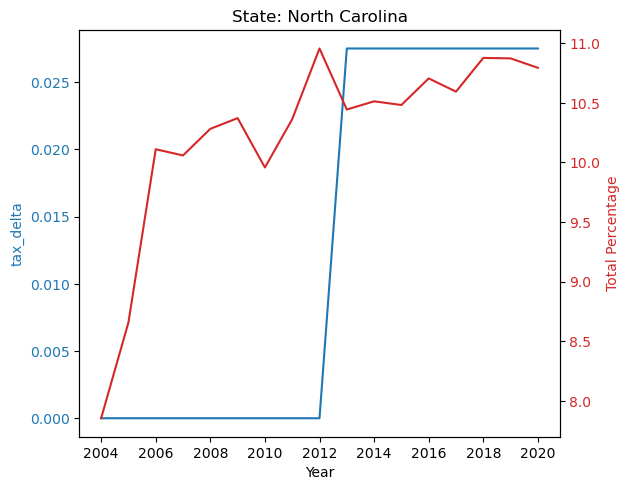

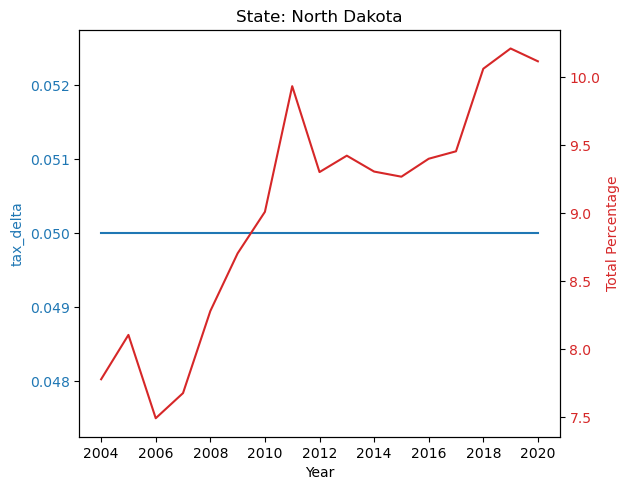

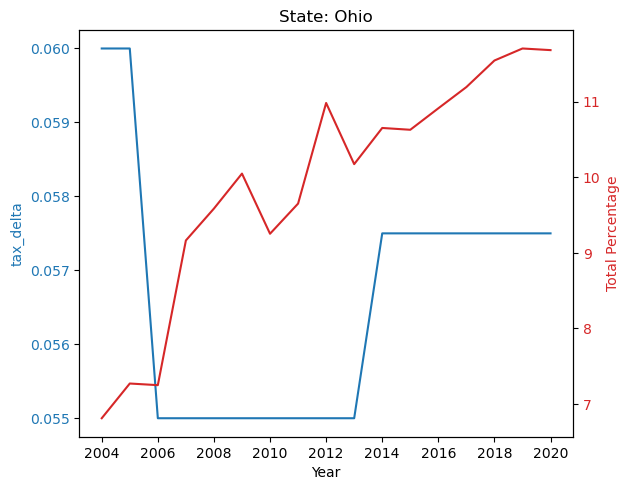

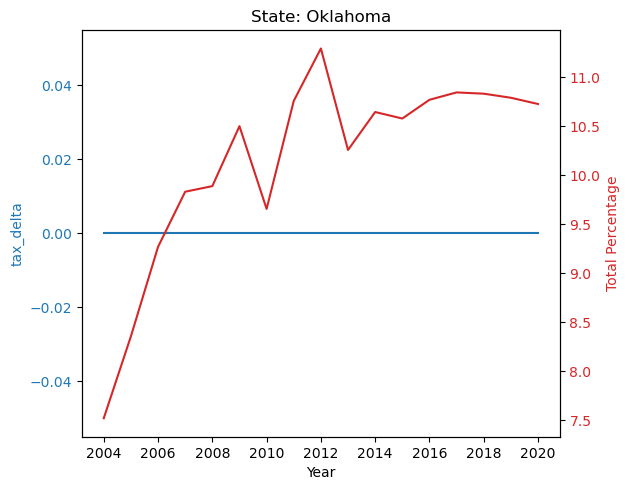

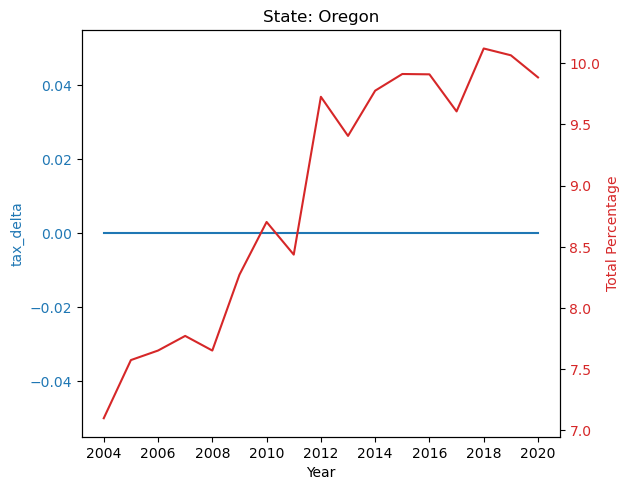

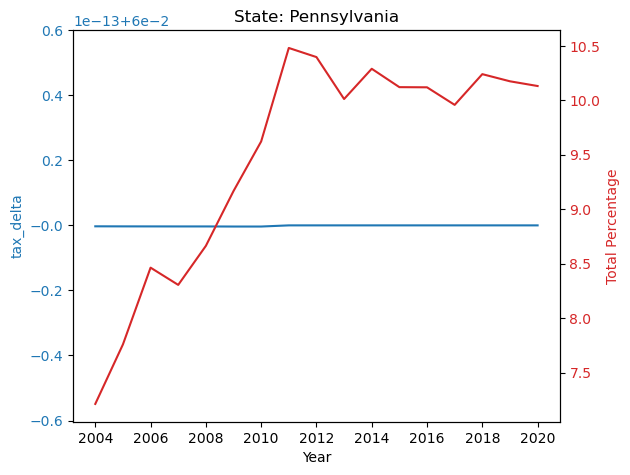

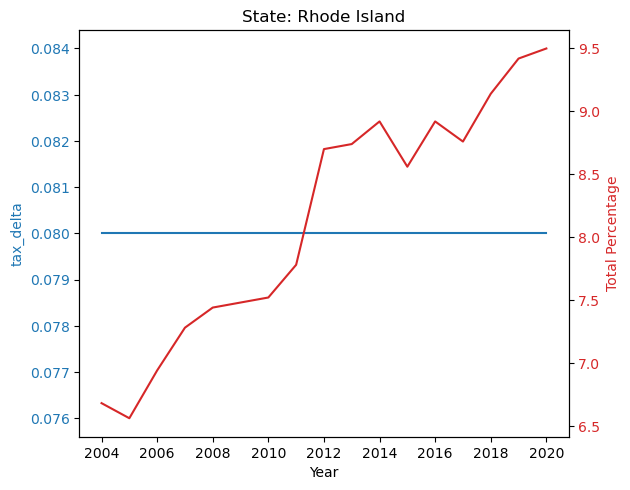

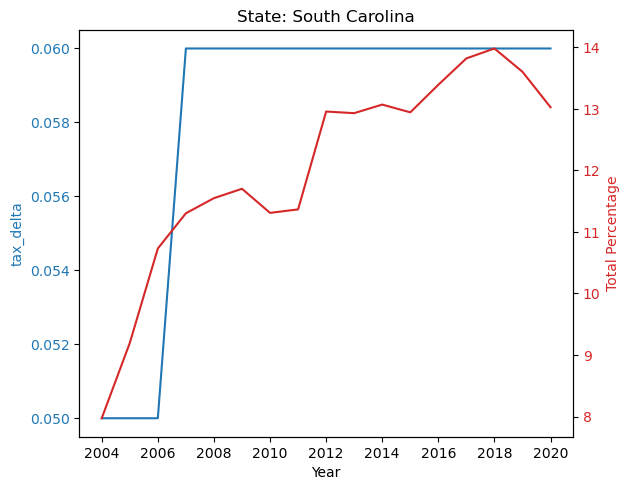

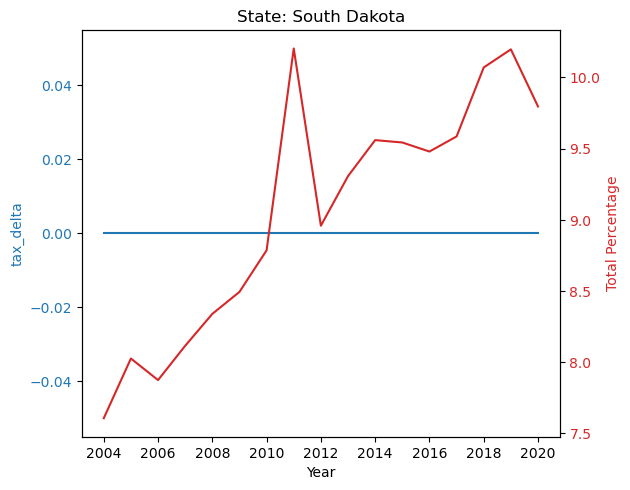

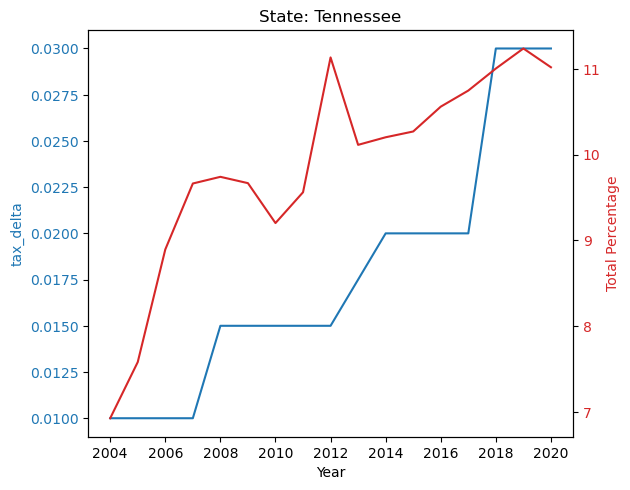

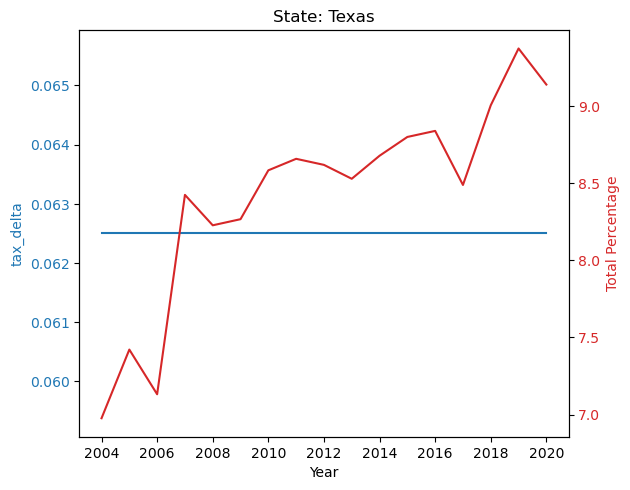

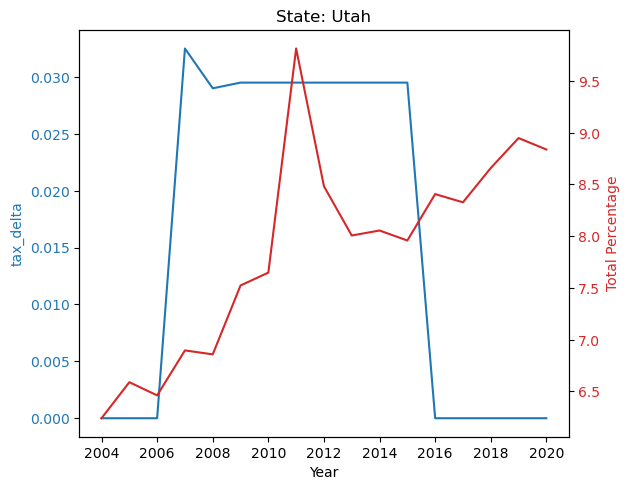

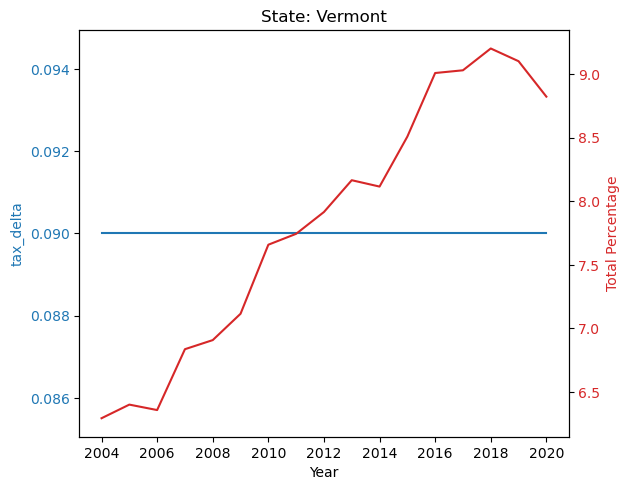

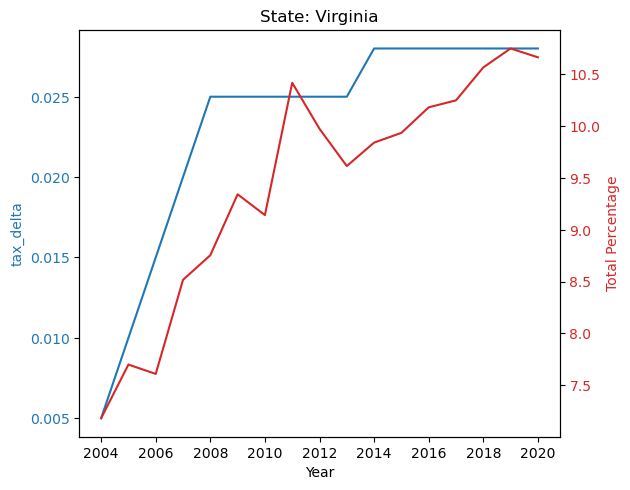

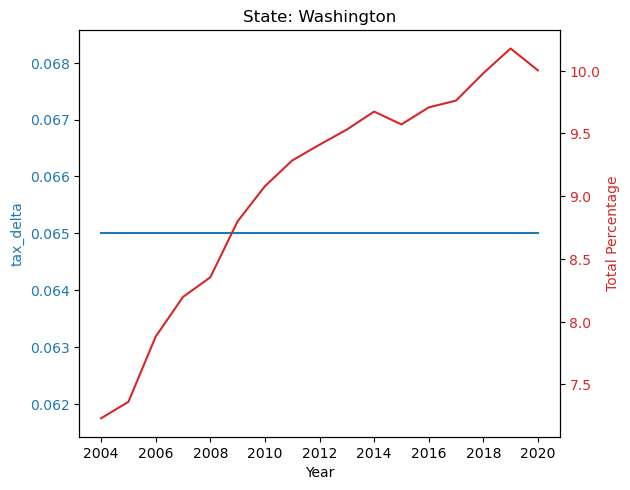

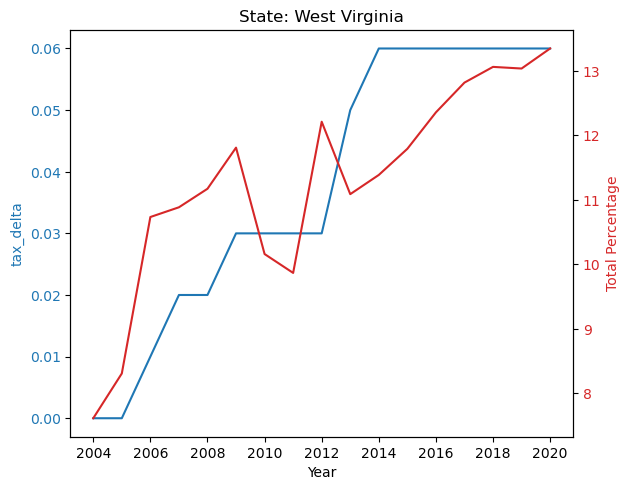

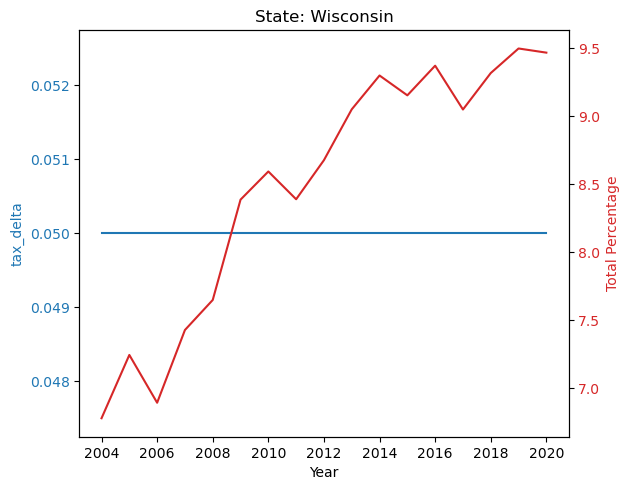

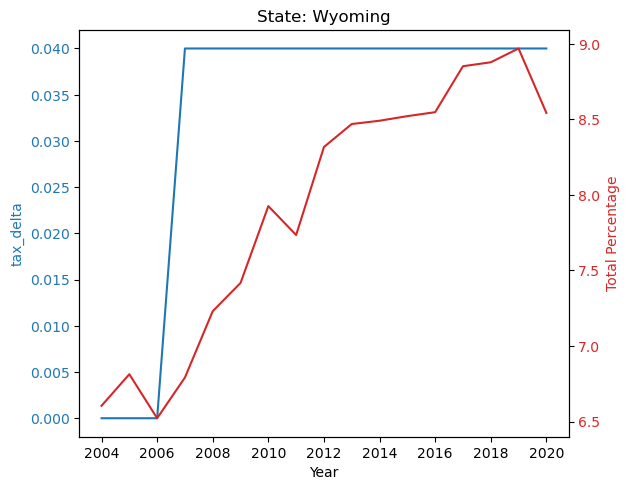

In [45]:
for state in states:
    st_df = df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    fig, ax1 = plt.subplots()
    
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('tax_delta', color=color)
    ax1.plot(st_df['Year'], st_df['tax_delta'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:red'
    ax2.set_ylabel('Total Percentage', color=color)  # we already handled the x-label with ax1
    ax2.plot(st_df['Year'], st_df['Total Percentage'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("State: "+state)
    plt.savefig('Plot/EDA State/'+state+'_'+'Total on tax_delta.png')
    plt.show()
    

In [6]:
import numpy as np
from scipy import signal
# rng = np.random.default_rng()
x = df_diab_mean_pivot['tax_delta']
y = df_diab_mean_pivot['Total Percentage']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]

In [7]:
print(lag)

5


In [8]:
print(lags)

[-848 -847 -846 ...  846  847  848]


In [9]:
correlation

array([0.        , 0.        , 0.36984348, ..., 0.44533333, 0.62544776,
       0.        ])

In [11]:
df_diab_mean_pivot.corr(method='pearson')

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.274631         -0.059568    -0.674554   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.274631    0.982055  0.138713  
Total Percentage        0.033241  -0.059568    0.011134  0.631500  
Grocery Tax             0.069229  -0.674554   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.689755    0.163921  0.064171  
tax_delta               0.689755   1.000000    0.283515  0.079370  
Population              0.163921   0.283515    1.000000  0.044320  
Year                    0.064171   0.079370    0.044320  1.000000

In [12]:
df_diab_mean_pivot.corr(method='kendall')

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.208464    -0.085909   
Total Percentage        0.208464          1.000000     0.087416   
Grocery Tax            -0.085909          0.087416     1.000000   
Restaurant Tax          0.091953          0.017544    -0.024892   
tax_delta               0.162180         -0.043267    -0.528311   
Population              0.901210          0.115258    -0.111128   
Year                    0.105943          0.476172    -0.021474   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.091953   0.162180    0.901210  0.105943  
Total Percentage        0.017544  -0.043267    0.115258  0.476172  
Grocery Tax            -0.024892  -0.528311   -0.111128 -0.021474  
Restaurant Tax          1.000000   0.679468    0.078694  0.057412  
tax_delta               0.679468   1.000000    0.172501  0.059221  
Population              0.078694   0.172501    1.000000  0.044569  
Year                    0.057412   0.059221    0.044569  1.000000

In [13]:
# 1 year lag

In [14]:
df_diab_mean_pivot.shift(1)

Total Absolute  Total Percentage  Grocery Tax  Restaurant Tax  \
State                                                                          
Alabama                   NaN               NaN          NaN             NaN   
Alaska               470221.0         12.508955      0.04000           0.040   
Arizona               42967.0          8.906667      0.00000           0.000   
Arkansas             545978.0         11.166667      0.00000           0.056   
California           256151.0         11.662667      0.00125           0.065   
...                       ...               ...          ...             ...   
Virginia              27365.0          6.292857      0.00000           0.090   
Washington           365648.0          7.180597      0.03000           0.035   
West Virginia        297134.0          7.230769      0.00000           0.065   
Wisconsin            108953.0          7.612727      0.06000           0.060   
Wyoming              259121.0          6.777778      0.00000           0.050   

               tax_delta    Population    Year  
State                                           
Alabama              NaN           NaN     NaN  
Alaska           0.00000  3.711098e+06  2020.0  
Arizona          0.00000  5.349532e+05  2020.0  
Arkansas         0.05600  5.584050e+06  2020.0  
California       0.06375  2.255689e+06  2020.0  
...                  ...           ...     ...  
Virginia         0.09000  4.611329e+05  2004.0  
Washington       0.00500  5.448649e+06  2004.0  
West Virginia    0.06500  4.505031e+06  2004.0  
Wisconsin        0.00000  1.365747e+06  2004.0  
Wyoming          0.05000  4.007344e+06  2004.0  

[849 rows x 7 columns]

In [15]:
df_diab_mean_pivot

Total Absolute  Total Percentage  Grocery Tax  Restaurant Tax  \
State                                                                          
Alabama              470221.0         12.508955      0.04000          0.0400   
Alaska                42967.0          8.906667      0.00000          0.0000   
Arizona              545978.0         11.166667      0.00000          0.0560   
Arkansas             256151.0         11.662667      0.00125          0.0650   
California          2733304.0          9.134483      0.00000          0.0725   
...                       ...               ...          ...             ...   
Virginia             365648.0          7.180597      0.03000          0.0350   
Washington           297134.0          7.230769      0.00000          0.0650   
West Virginia        108953.0          7.612727      0.06000          0.0600   
Wisconsin            259121.0          6.777778      0.00000          0.0500   
Wyoming               23277.0          6.604348      0.04000          0.0400   

               tax_delta    Population    Year  
State                                           
Alabama          0.00000  3.711098e+06  2020.0  
Alaska           0.00000  5.349532e+05  2020.0  
Arizona          0.05600  5.584050e+06  2020.0  
Arkansas         0.06375  2.255689e+06  2020.0  
California       0.07250  2.957682e+07  2020.0  
...                  ...           ...     ...  
Virginia         0.00500  5.448649e+06  2004.0  
Washington       0.06500  4.505031e+06  2004.0  
West Virginia    0.00000  1.365747e+06  2004.0  
Wisconsin        0.05000  4.007344e+06  2004.0  
Wyoming          0.00000  3.650181e+05  2004.0  

[849 rows x 7 columns]

In [21]:
df_diab_mean_pivot_1year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(1)
    # print(st_df)
    df_diab_mean_pivot_1year_shifted = pd.concat([st_df,df_diab_mean_pivot_1year_shifted])


In [23]:
df_diab_mean_pivot_1year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.275896         -0.075839    -0.667077   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.275896    0.982055  0.138713  
Total Percentage        0.033241  -0.075839    0.011134  0.631500  
Grocery Tax             0.069229  -0.667077   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.684868    0.163921  0.064171  
tax_delta               0.684868   1.000000    0.284862  0.081194  
Population              0.163921   0.284862    1.000000  0.044320  
Year                    0.064171   0.081194    0.044320  1.000000

In [24]:
df_diab_mean_pivot_2year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(2)
    # print(st_df)
    df_diab_mean_pivot_2year_shifted = pd.concat([st_df,df_diab_mean_pivot_2year_shifted])


In [25]:
df_diab_mean_pivot_2year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.277158         -0.089441    -0.657296   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.277158    0.982055  0.138713  
Total Percentage        0.033241  -0.089441    0.011134  0.631500  
Grocery Tax             0.069229  -0.657296   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.680724    0.163921  0.064171  
tax_delta               0.680724   1.000000    0.286386  0.082846  
Population              0.163921   0.286386    1.000000  0.044320  
Year                    0.064171   0.082846    0.044320  1.000000

In [26]:
df_diab_mean_pivot_3year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(3)
    # print(st_df)
    df_diab_mean_pivot_3year_shifted = pd.concat([st_df,df_diab_mean_pivot_3year_shifted])


In [27]:
df_diab_mean_pivot_3year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.279071         -0.096528    -0.649603   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.279071    0.982055  0.138713  
Total Percentage        0.033241  -0.096528    0.011134  0.631500  
Grocery Tax             0.069229  -0.649603   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.677899    0.163921  0.064171  
tax_delta               0.677899   1.000000    0.287796  0.084704  
Population              0.163921   0.287796    1.000000  0.044320  
Year                    0.064171   0.084704    0.044320  1.000000

In [28]:
df_diab_mean_pivot_4year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(4)
    # print(st_df)
    df_diab_mean_pivot_4year_shifted = pd.concat([st_df,df_diab_mean_pivot_4year_shifted])


In [29]:
df_diab_mean_pivot_4year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.281005         -0.107140    -0.644782   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.281005    0.982055  0.138713  
Total Percentage        0.033241  -0.107140    0.011134  0.631500  
Grocery Tax             0.069229  -0.644782   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.676402    0.163921  0.064171  
tax_delta               0.676402   1.000000    0.289619  0.087111  
Population              0.163921   0.289619    1.000000  0.044320  
Year                    0.064171   0.087111    0.044320  1.000000

In [30]:
df_diab_mean_pivot_5year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(5)
    # print(st_df)
    df_diab_mean_pivot_5year_shifted = pd.concat([st_df,df_diab_mean_pivot_5year_shifted])


In [32]:
df_diab_mean_pivot_5year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.282296         -0.120862    -0.639123   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.282296    0.982055  0.138713  
Total Percentage        0.033241  -0.120862    0.011134  0.631500  
Grocery Tax             0.069229  -0.639123   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.673885    0.163921  0.064171  
tax_delta               0.673885   1.000000    0.290977  0.090028  
Population              0.163921   0.290977    1.000000  0.044320  
Year                    0.064171   0.090028    0.044320  1.000000

## 2. EDA and LAG analysis on gender divided data

In [36]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px
import matplotlib.pyplot as plt


In [37]:
root_csv = 'Diabetes//csv files/'
root_pickle = 'Diabetes/pickle files/'
df_diab_mean_pivot = pd.read_pickle(root_pickle +'Diabetes_Mean_Gender_Pivot.pkl')
df_diab_mean_pivot.head(5)



Gender Absolute  Gender Percentage  Grocery Tax  Restaurant Tax  \
State                                                                         
Alabama            228494.0          12.741791      0.04000          0.0400   
Alaska              22989.0           9.030000      0.00000          0.0000   
Arizona            289963.0          11.626667      0.00000          0.0560   
Arkansas           127523.0          12.032000      0.00125          0.0650   
California        1374872.0           9.481034      0.00000          0.0725   

            tax_delta    Population    Year Gender  
State                                               
Alabama       0.00000  1.793264e+06  2020.0   Male  
Alaska        0.00000  2.545847e+05  2020.0   Male  
Arizona       0.05600  2.493948e+06  2020.0   Male  
Arkansas      0.06375  1.059865e+06  2020.0   Male  
California    0.07250  1.450129e+07  2020.0   Male

In [39]:
states=df_diab_mean_pivot.index.unique()

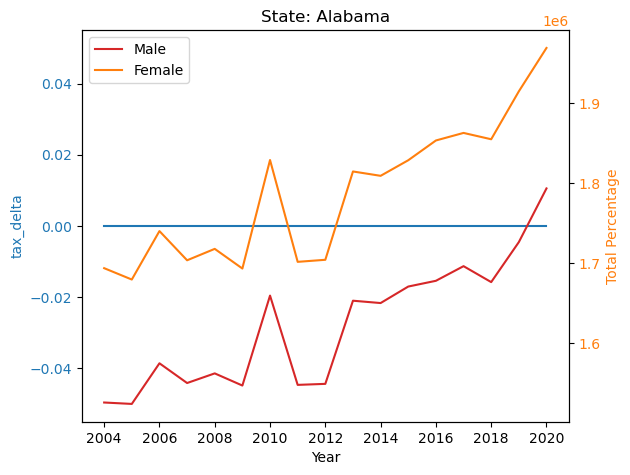

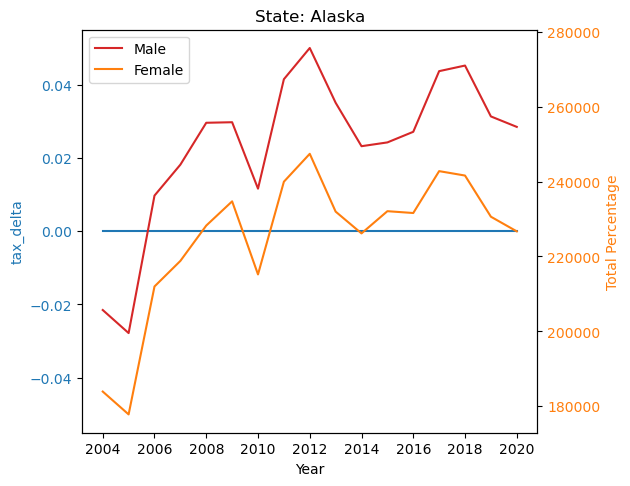

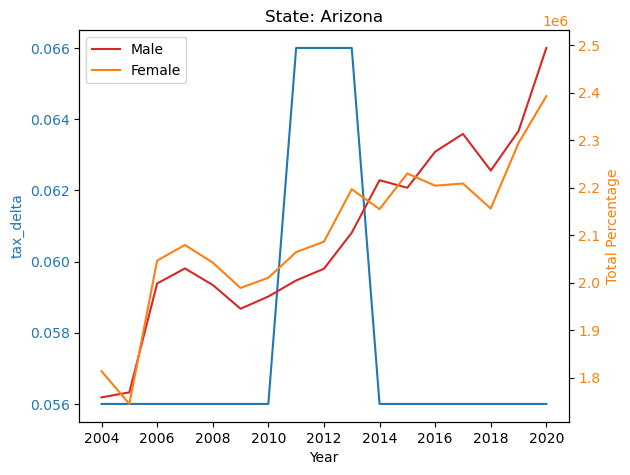

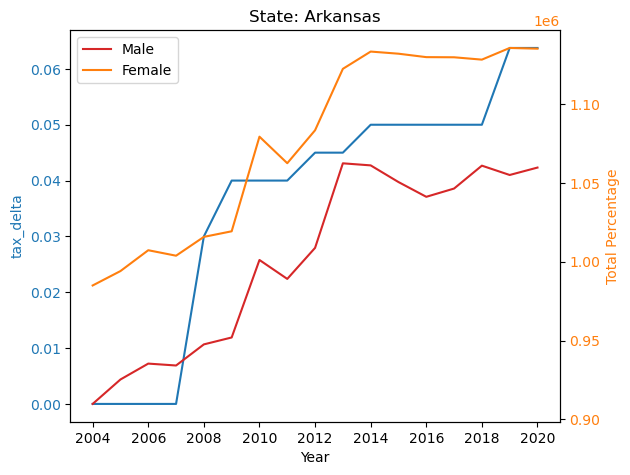

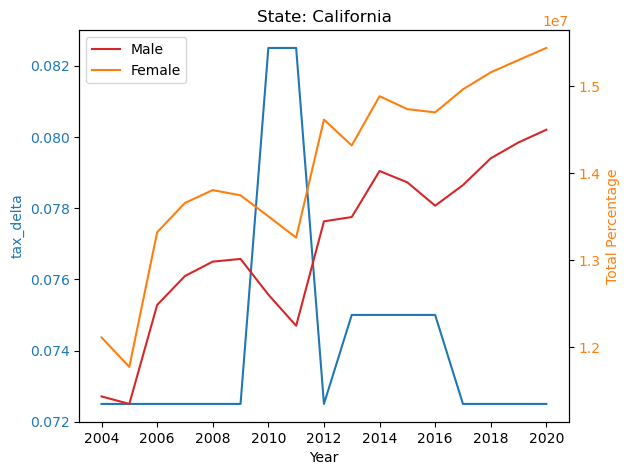

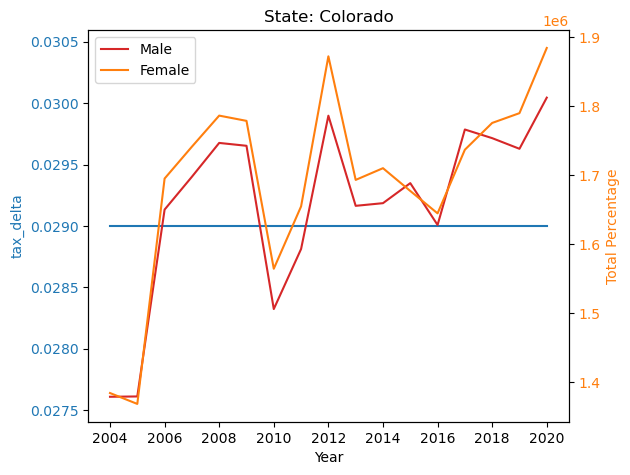

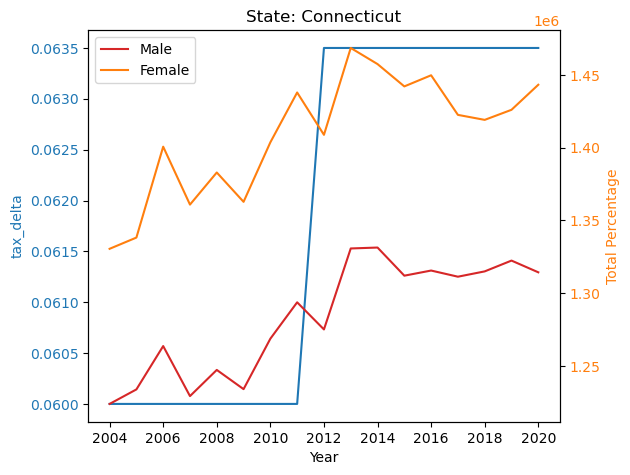

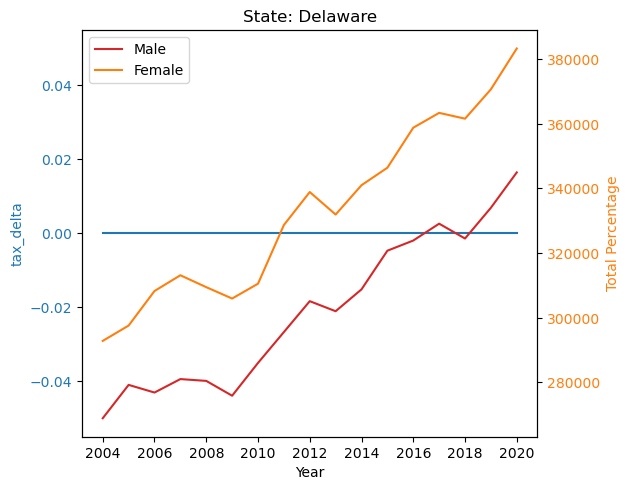

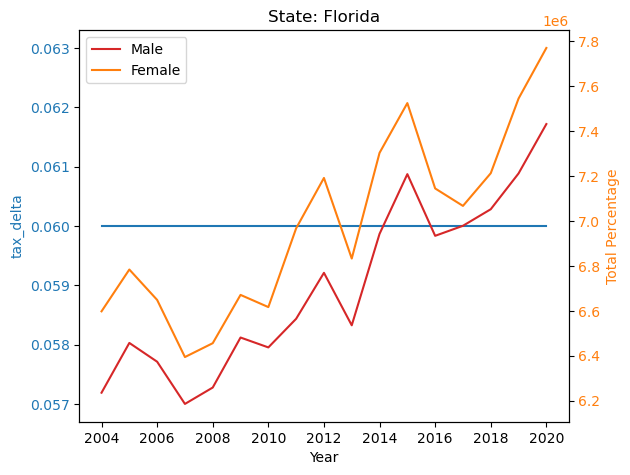

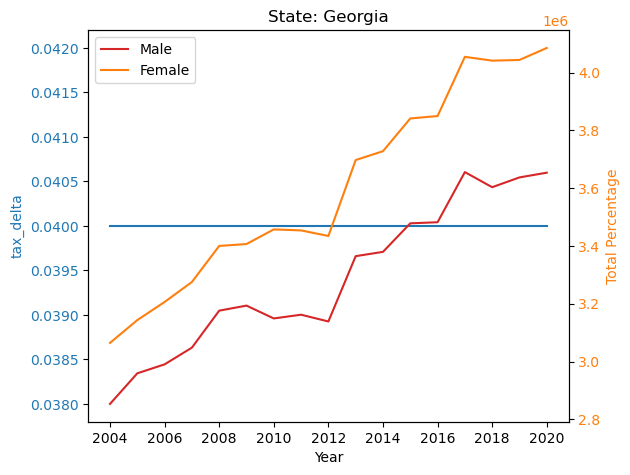

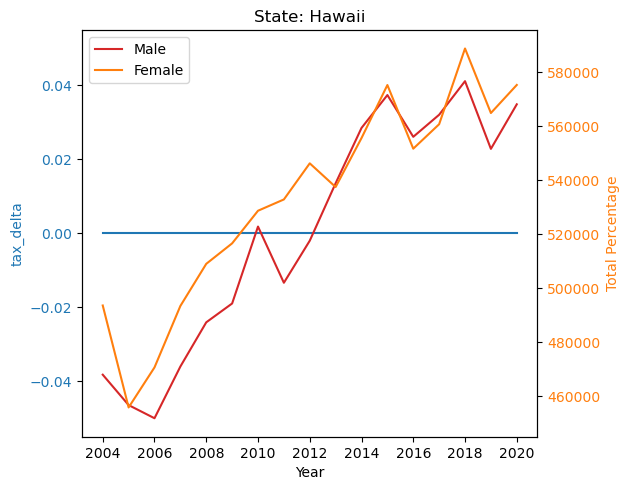

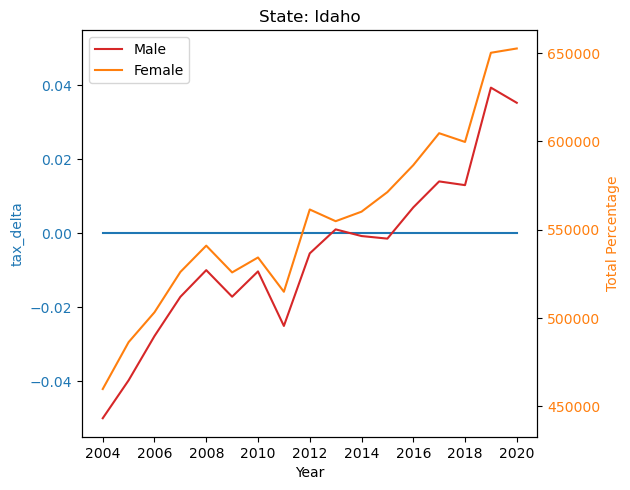

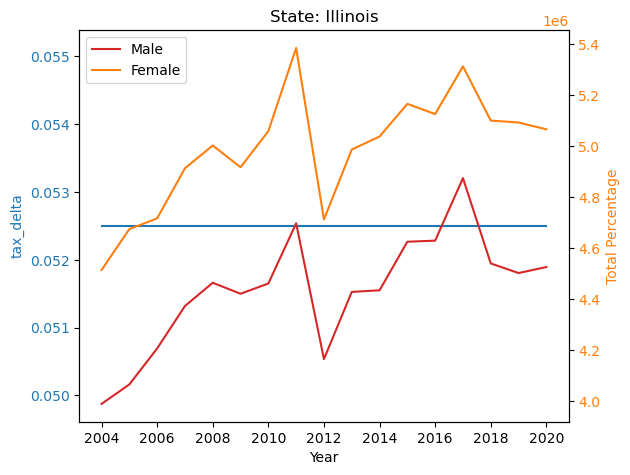

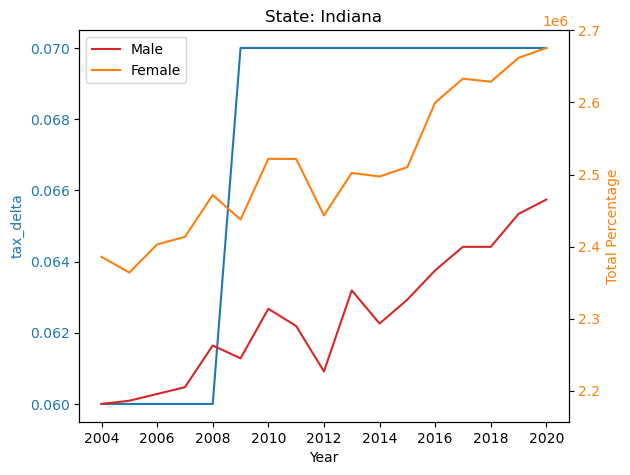

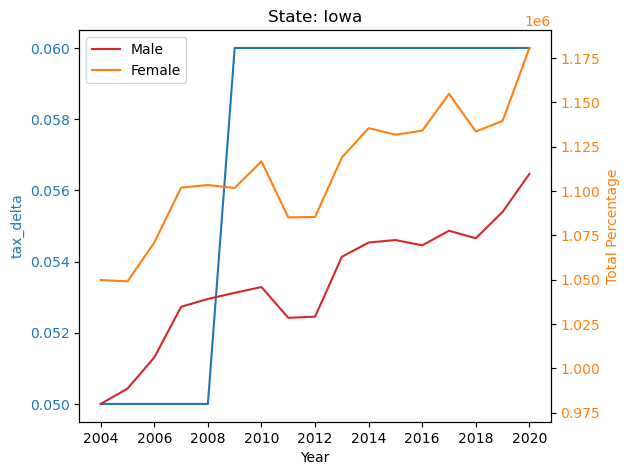

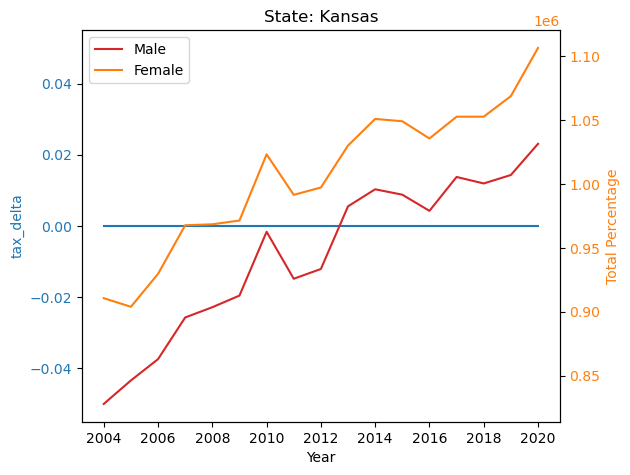

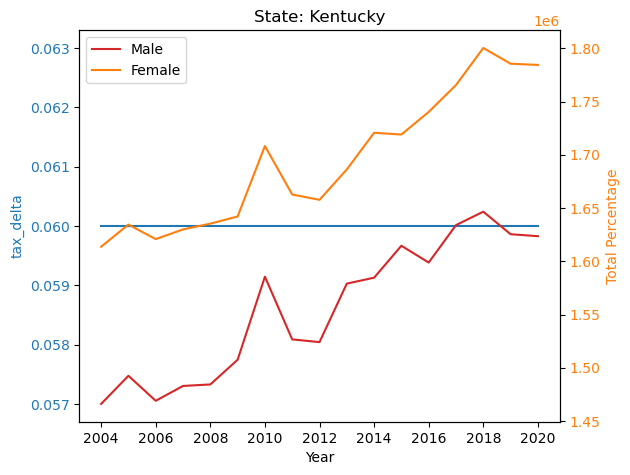

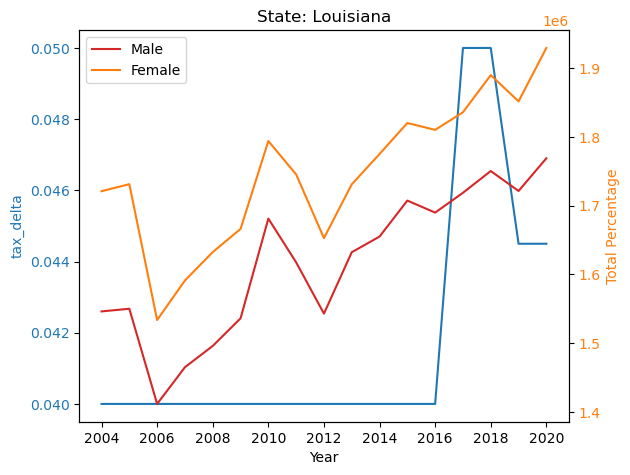

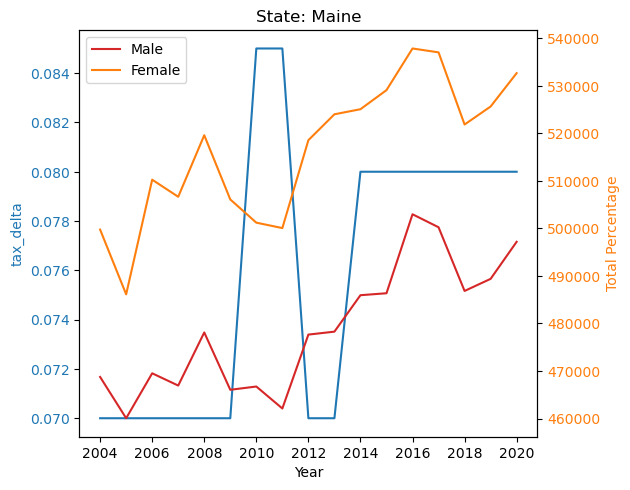

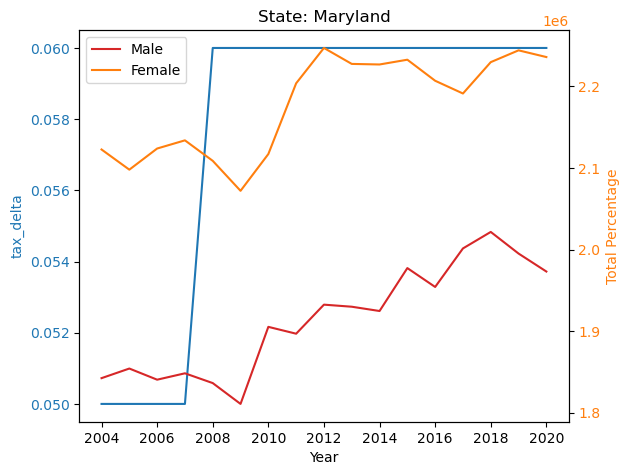

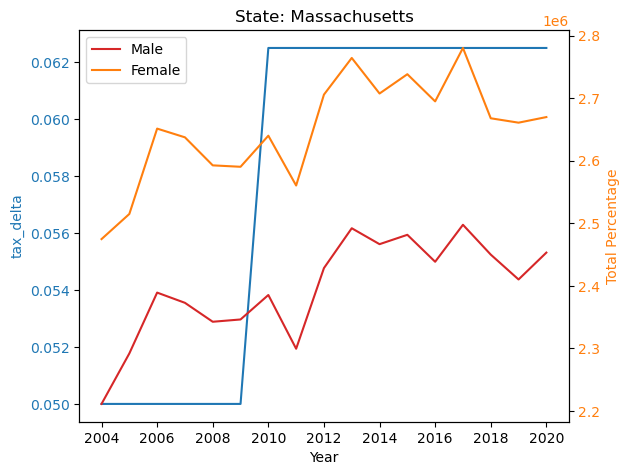

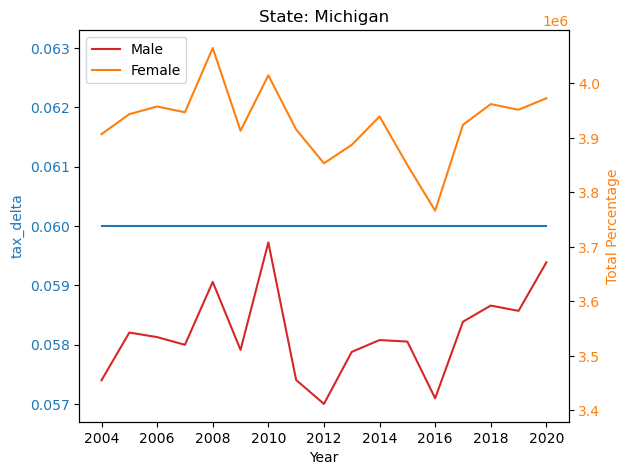

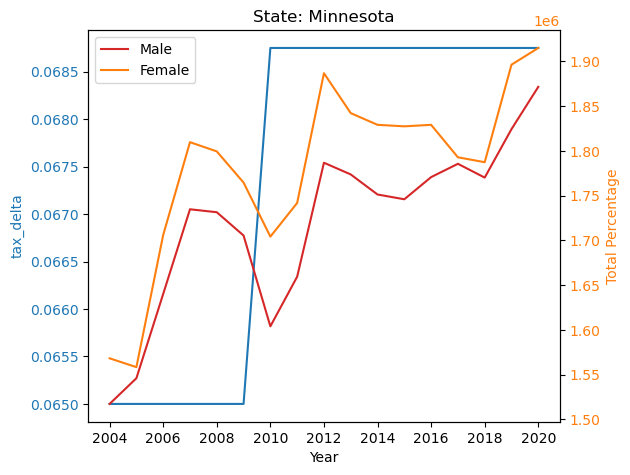

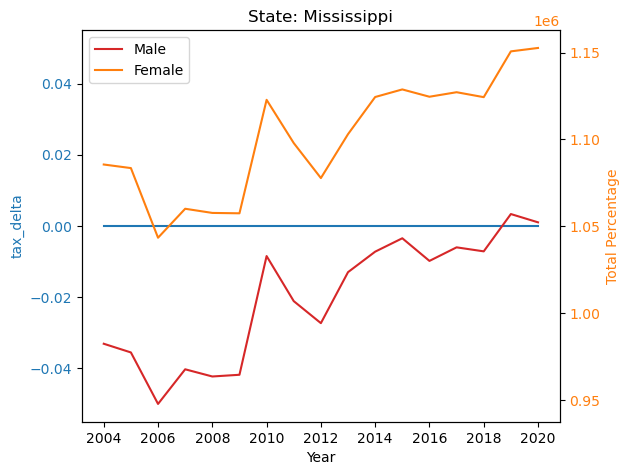

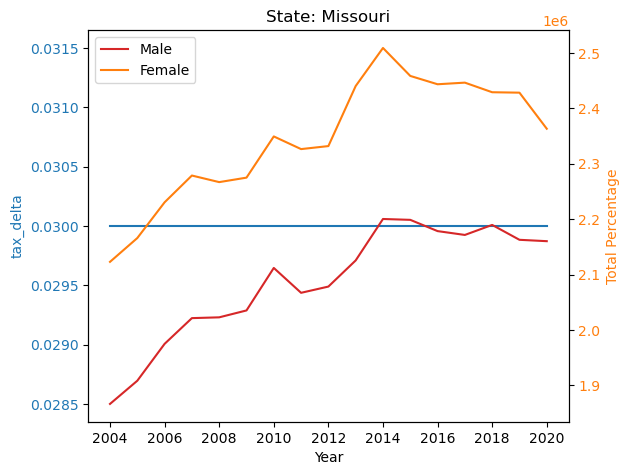

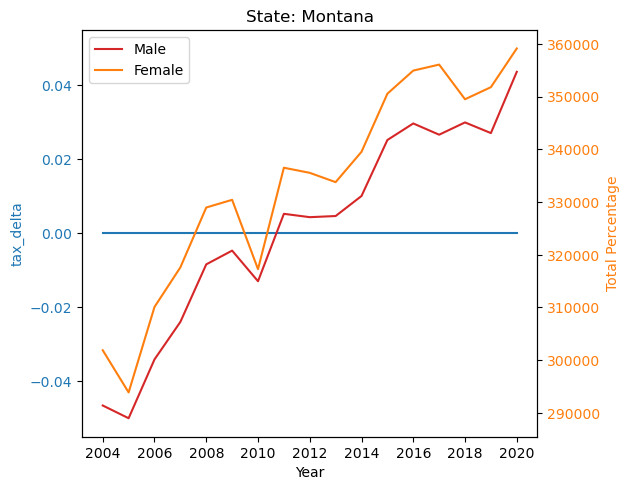

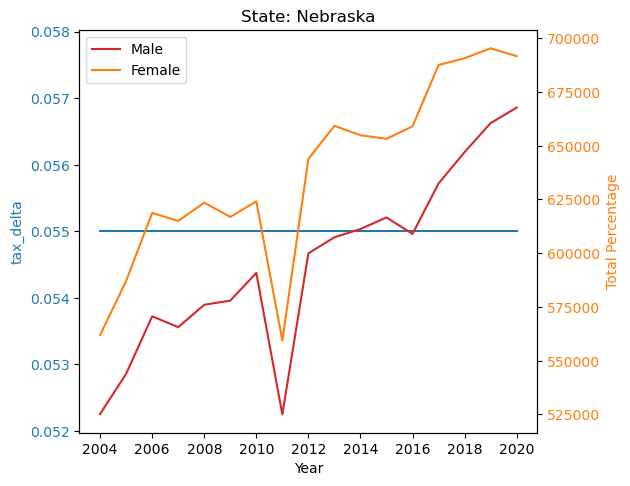

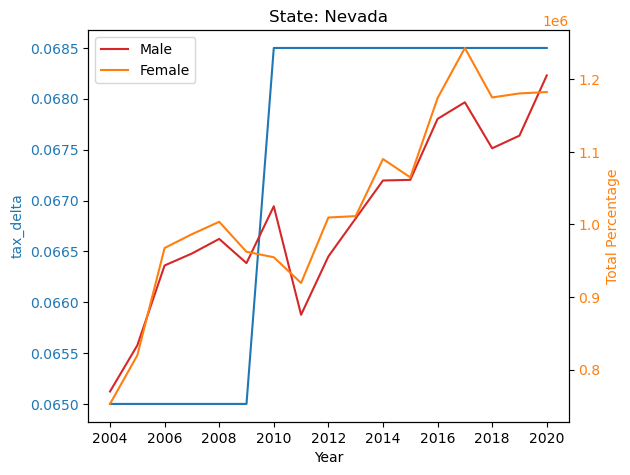

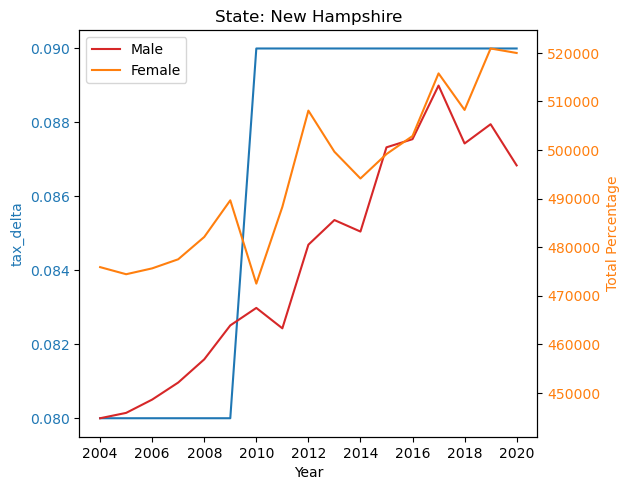

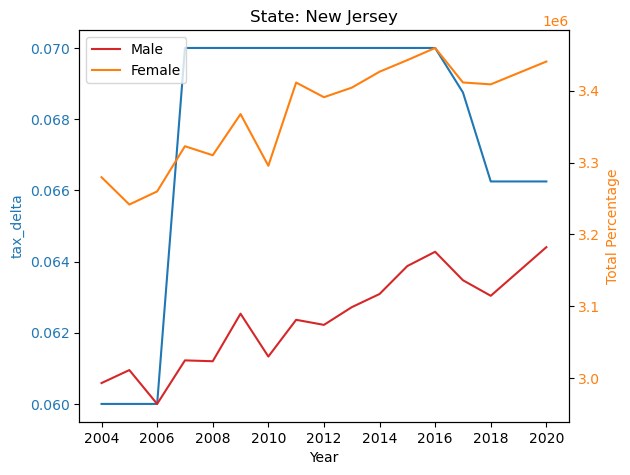

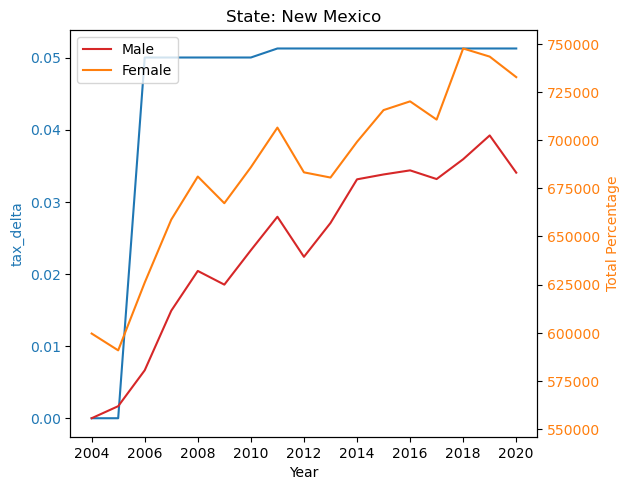

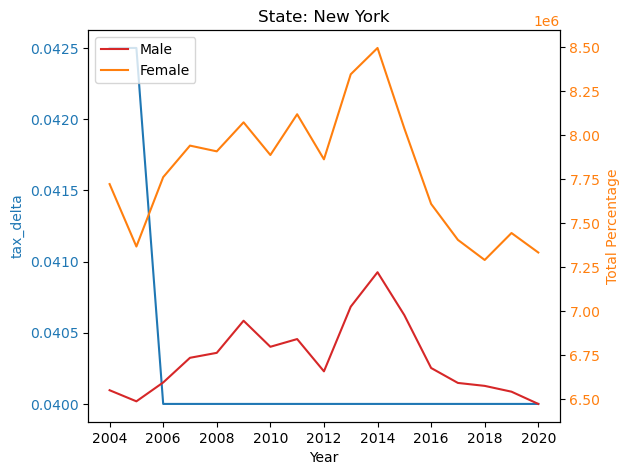

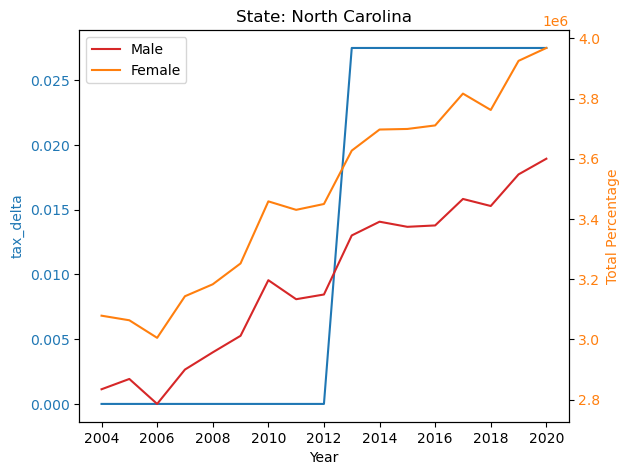

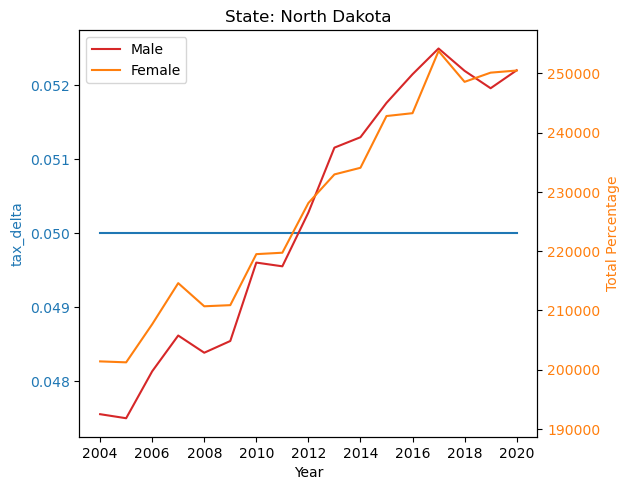

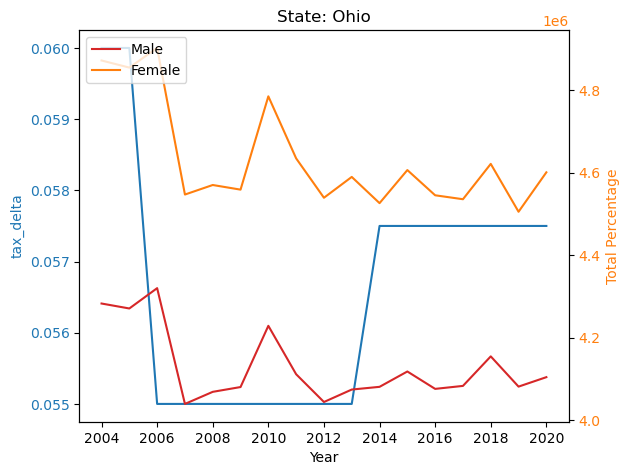

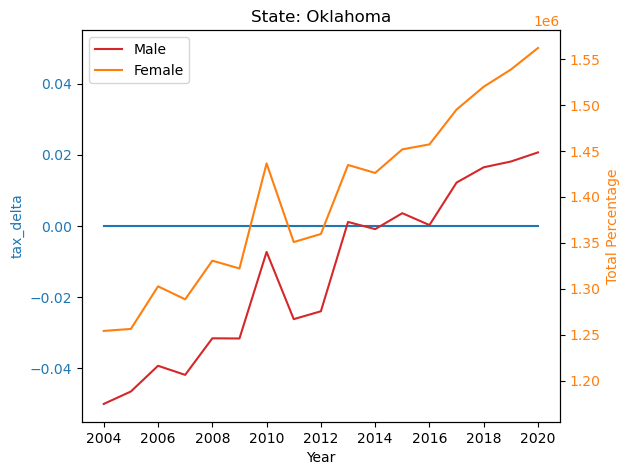

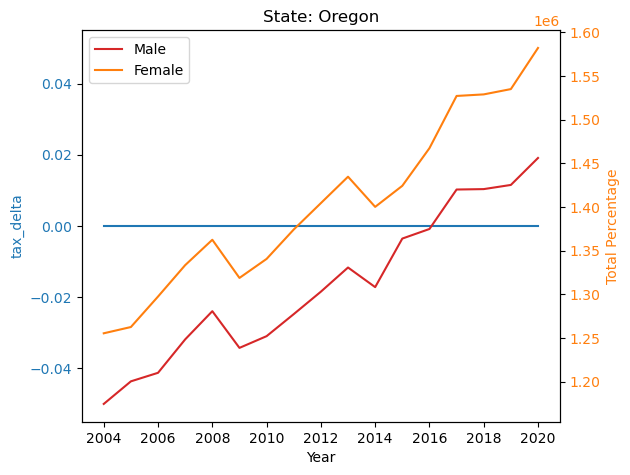

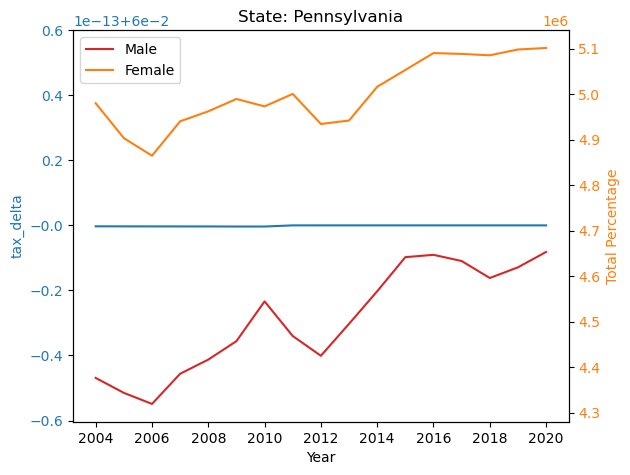

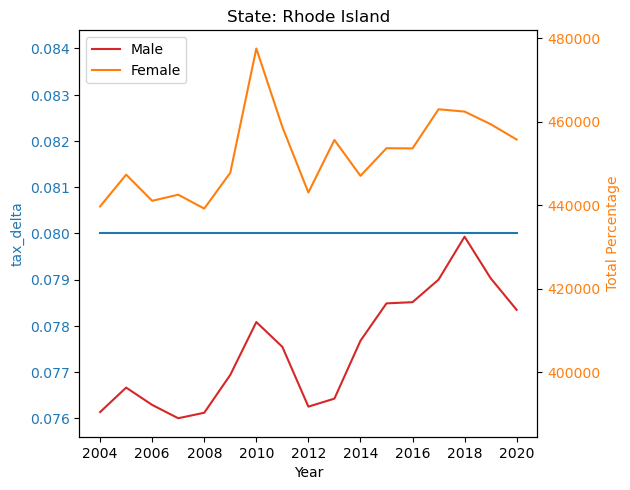

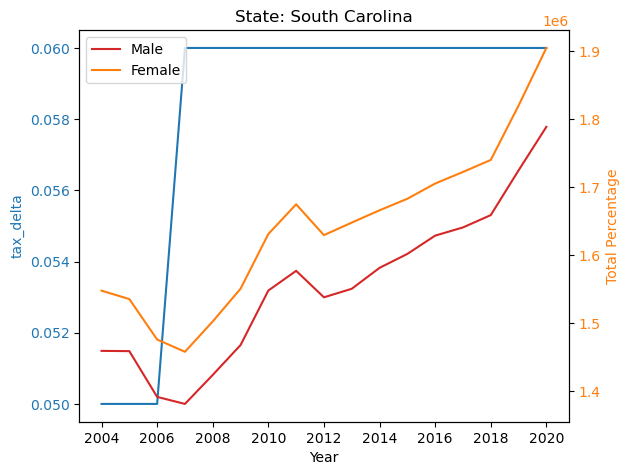

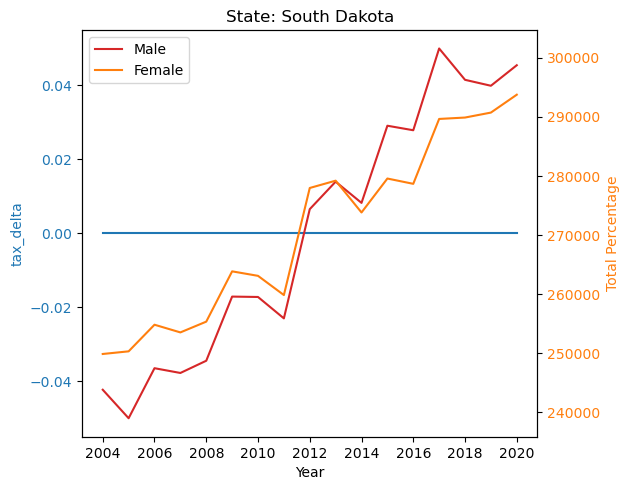

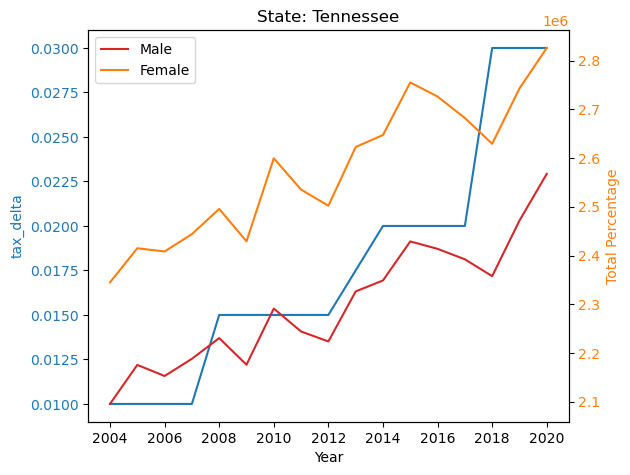

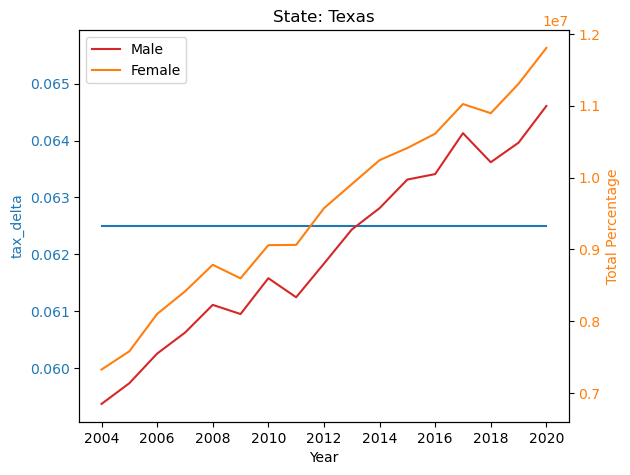

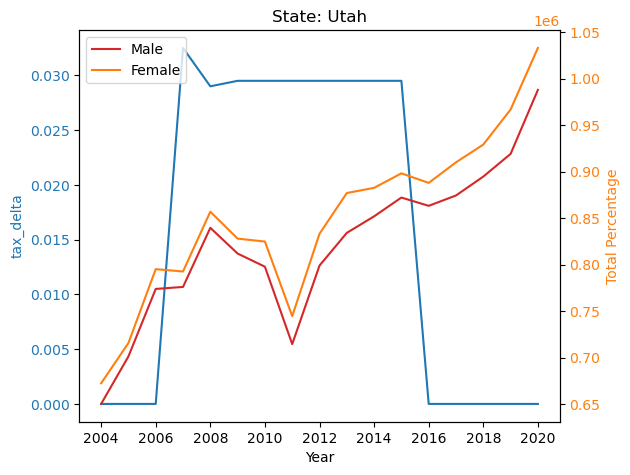

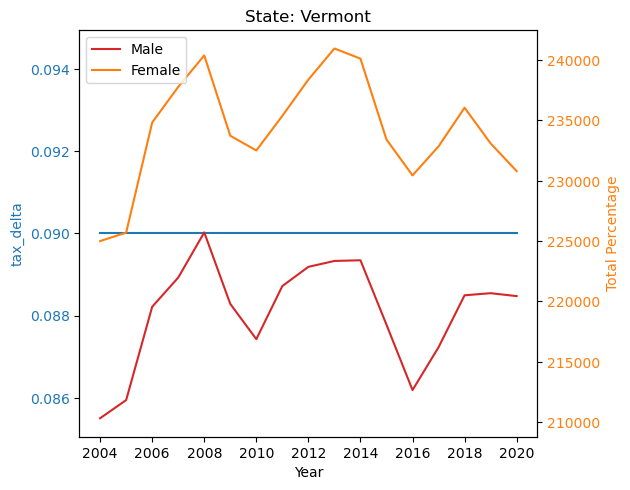

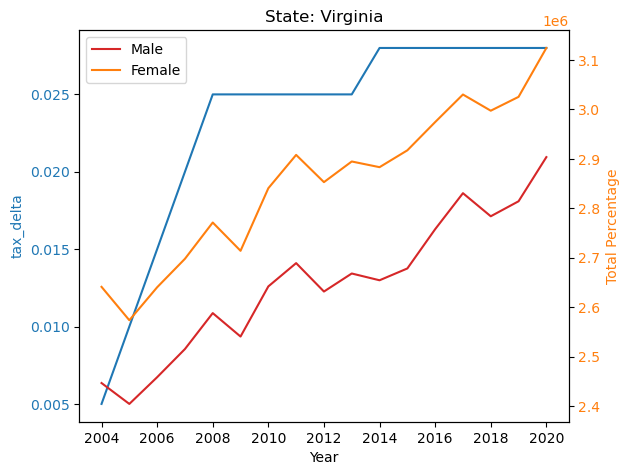

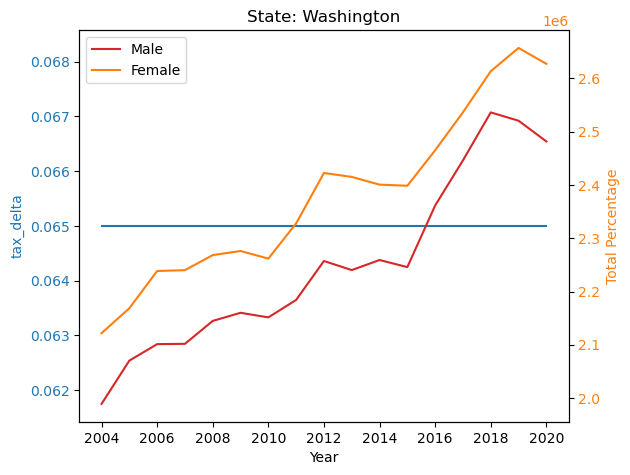

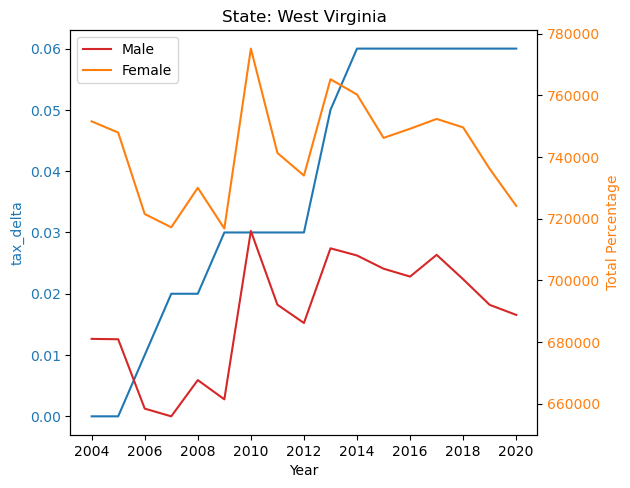

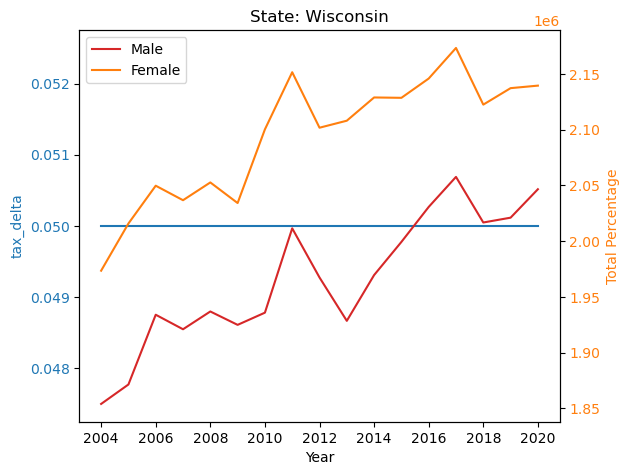

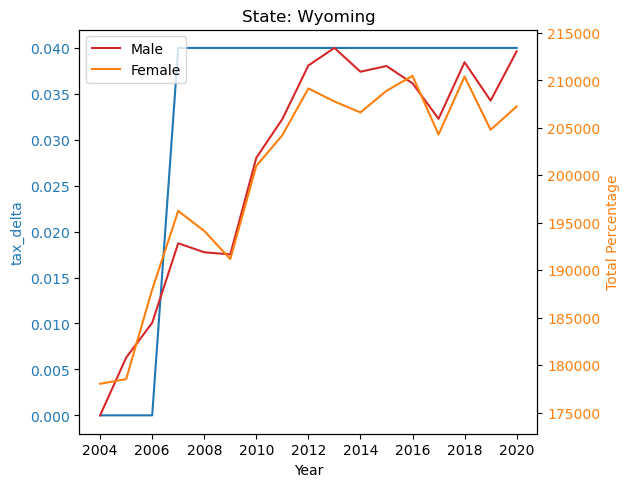

In [53]:
for state in states:
    st_df = df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    fig, ax1 = plt.subplots()
    # print(st_df)
    
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('tax_delta', color=color)
    ax1.plot(st_df['Year'], st_df['tax_delta'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # print(st_df[st_df['Gender']=='Male']['Population'])
    # break
    color = 'tab:red'
    ax2.set_ylabel('Total Percentage', color=color)  # we already handled the x-label with ax1
    ax2.plot(st_df[st_df['Gender']=='Male']['Year'], st_df[st_df['Gender']=='Male']['Population'], color=color, label="Male")
    ax2.tick_params(axis='y', labelcolor=color)

    color = 'tab:orange'
    ax2.set_ylabel('Total Percentage', color=color)  # we already handled the x-label with ax1
    ax2.plot(st_df[st_df['Gender']=='Female']['Year'], st_df[st_df['Gender']=='Female']['Population'], color=color, label="Female")
    ax2.tick_params(axis='y', labelcolor=color)
    plt.legend(loc="upper left")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("State: "+state)
    plt.savefig('Plot/EDA Gender/'+state+'_'+'Gender on tax_delta.png')
    
    plt.show()
    

In [ ]:
import numpy as np
from scipy import signal
# rng = np.random.default_rng()
x = df_diab_mean_pivot['tax_delta']
y = df_diab_mean_pivot['Total Percentage']
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]

In [7]:
print(lag)

5


In [8]:
print(lags)

[-848 -847 -846 ...  846  847  848]


In [9]:
correlation

array([0.        , 0.        , 0.36984348, ..., 0.44533333, 0.62544776,
       0.        ])

In [11]:
df_diab_mean_pivot.corr(method='pearson')

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.274631         -0.059568    -0.674554   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.274631    0.982055  0.138713  
Total Percentage        0.033241  -0.059568    0.011134  0.631500  
Grocery Tax             0.069229  -0.674554   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.689755    0.163921  0.064171  
tax_delta               0.689755   1.000000    0.283515  0.079370  
Population              0.163921   0.283515    1.000000  0.044320  
Year                    0.064171   0.079370    0.044320  1.000000

In [12]:
df_diab_mean_pivot.corr(method='kendall')

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.208464    -0.085909   
Total Percentage        0.208464          1.000000     0.087416   
Grocery Tax            -0.085909          0.087416     1.000000   
Restaurant Tax          0.091953          0.017544    -0.024892   
tax_delta               0.162180         -0.043267    -0.528311   
Population              0.901210          0.115258    -0.111128   
Year                    0.105943          0.476172    -0.021474   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.091953   0.162180    0.901210  0.105943  
Total Percentage        0.017544  -0.043267    0.115258  0.476172  
Grocery Tax            -0.024892  -0.528311   -0.111128 -0.021474  
Restaurant Tax          1.000000   0.679468    0.078694  0.057412  
tax_delta               0.679468   1.000000    0.172501  0.059221  
Population              0.078694   0.172501    1.000000  0.044569  
Year                    0.057412   0.059221    0.044569  1.000000

In [13]:
# 1 year lag

In [14]:
df_diab_mean_pivot.shift(1)

Total Absolute  Total Percentage  Grocery Tax  Restaurant Tax  \
State                                                                          
Alabama                   NaN               NaN          NaN             NaN   
Alaska               470221.0         12.508955      0.04000           0.040   
Arizona               42967.0          8.906667      0.00000           0.000   
Arkansas             545978.0         11.166667      0.00000           0.056   
California           256151.0         11.662667      0.00125           0.065   
...                       ...               ...          ...             ...   
Virginia              27365.0          6.292857      0.00000           0.090   
Washington           365648.0          7.180597      0.03000           0.035   
West Virginia        297134.0          7.230769      0.00000           0.065   
Wisconsin            108953.0          7.612727      0.06000           0.060   
Wyoming              259121.0          6.777778      0.00000           0.050   

               tax_delta    Population    Year  
State                                           
Alabama              NaN           NaN     NaN  
Alaska           0.00000  3.711098e+06  2020.0  
Arizona          0.00000  5.349532e+05  2020.0  
Arkansas         0.05600  5.584050e+06  2020.0  
California       0.06375  2.255689e+06  2020.0  
...                  ...           ...     ...  
Virginia         0.09000  4.611329e+05  2004.0  
Washington       0.00500  5.448649e+06  2004.0  
West Virginia    0.06500  4.505031e+06  2004.0  
Wisconsin        0.00000  1.365747e+06  2004.0  
Wyoming          0.05000  4.007344e+06  2004.0  

[849 rows x 7 columns]

In [15]:
df_diab_mean_pivot

Total Absolute  Total Percentage  Grocery Tax  Restaurant Tax  \
State                                                                          
Alabama              470221.0         12.508955      0.04000          0.0400   
Alaska                42967.0          8.906667      0.00000          0.0000   
Arizona              545978.0         11.166667      0.00000          0.0560   
Arkansas             256151.0         11.662667      0.00125          0.0650   
California          2733304.0          9.134483      0.00000          0.0725   
...                       ...               ...          ...             ...   
Virginia             365648.0          7.180597      0.03000          0.0350   
Washington           297134.0          7.230769      0.00000          0.0650   
West Virginia        108953.0          7.612727      0.06000          0.0600   
Wisconsin            259121.0          6.777778      0.00000          0.0500   
Wyoming               23277.0          6.604348      0.04000          0.0400   

               tax_delta    Population    Year  
State                                           
Alabama          0.00000  3.711098e+06  2020.0  
Alaska           0.00000  5.349532e+05  2020.0  
Arizona          0.05600  5.584050e+06  2020.0  
Arkansas         0.06375  2.255689e+06  2020.0  
California       0.07250  2.957682e+07  2020.0  
...                  ...           ...     ...  
Virginia         0.00500  5.448649e+06  2004.0  
Washington       0.06500  4.505031e+06  2004.0  
West Virginia    0.00000  1.365747e+06  2004.0  
Wisconsin        0.05000  4.007344e+06  2004.0  
Wyoming          0.00000  3.650181e+05  2004.0  

[849 rows x 7 columns]

In [21]:
df_diab_mean_pivot_1year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(1)
    # print(st_df)
    df_diab_mean_pivot_1year_shifted = pd.concat([st_df,df_diab_mean_pivot_1year_shifted])


In [23]:
df_diab_mean_pivot_1year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.275896         -0.075839    -0.667077   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.275896    0.982055  0.138713  
Total Percentage        0.033241  -0.075839    0.011134  0.631500  
Grocery Tax             0.069229  -0.667077   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.684868    0.163921  0.064171  
tax_delta               0.684868   1.000000    0.284862  0.081194  
Population              0.163921   0.284862    1.000000  0.044320  
Year                    0.064171   0.081194    0.044320  1.000000

In [24]:
df_diab_mean_pivot_2year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(2)
    # print(st_df)
    df_diab_mean_pivot_2year_shifted = pd.concat([st_df,df_diab_mean_pivot_2year_shifted])


In [25]:
df_diab_mean_pivot_2year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.277158         -0.089441    -0.657296   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.277158    0.982055  0.138713  
Total Percentage        0.033241  -0.089441    0.011134  0.631500  
Grocery Tax             0.069229  -0.657296   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.680724    0.163921  0.064171  
tax_delta               0.680724   1.000000    0.286386  0.082846  
Population              0.163921   0.286386    1.000000  0.044320  
Year                    0.064171   0.082846    0.044320  1.000000

In [26]:
df_diab_mean_pivot_3year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(3)
    # print(st_df)
    df_diab_mean_pivot_3year_shifted = pd.concat([st_df,df_diab_mean_pivot_3year_shifted])


In [27]:
df_diab_mean_pivot_3year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.279071         -0.096528    -0.649603   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.279071    0.982055  0.138713  
Total Percentage        0.033241  -0.096528    0.011134  0.631500  
Grocery Tax             0.069229  -0.649603   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.677899    0.163921  0.064171  
tax_delta               0.677899   1.000000    0.287796  0.084704  
Population              0.163921   0.287796    1.000000  0.044320  
Year                    0.064171   0.084704    0.044320  1.000000

In [28]:
df_diab_mean_pivot_4year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(4)
    # print(st_df)
    df_diab_mean_pivot_4year_shifted = pd.concat([st_df,df_diab_mean_pivot_4year_shifted])


In [29]:
df_diab_mean_pivot_4year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.281005         -0.107140    -0.644782   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.281005    0.982055  0.138713  
Total Percentage        0.033241  -0.107140    0.011134  0.631500  
Grocery Tax             0.069229  -0.644782   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.676402    0.163921  0.064171  
tax_delta               0.676402   1.000000    0.289619  0.087111  
Population              0.163921   0.289619    1.000000  0.044320  
Year                    0.064171   0.087111    0.044320  1.000000

In [30]:
df_diab_mean_pivot_5year_shifted=pd.DataFrame()
for state in states:
    st_df=df_diab_mean_pivot[df_diab_mean_pivot.index==state]
    # print(st_df)
    st_df=st_df.sort_values(by=['Year'])
    st_df['tax_delta']=st_df['tax_delta'].shift(5)
    # print(st_df)
    df_diab_mean_pivot_5year_shifted = pd.concat([st_df,df_diab_mean_pivot_5year_shifted])


In [32]:
df_diab_mean_pivot_5year_shifted.corr()

Total Absolute  Total Percentage  Grocery Tax  \
Total Absolute          1.000000          0.139207    -0.208696   
Total Percentage        0.139207          1.000000     0.115966   
Grocery Tax            -0.208696          0.115966     1.000000   
Restaurant Tax          0.166436          0.033241     0.069229   
tax_delta               0.282296         -0.120862    -0.639123   
Population              0.982055          0.011134    -0.223501   
Year                    0.138713          0.631500    -0.043929   

                  Restaurant Tax  tax_delta  Population      Year  
Total Absolute          0.166436   0.282296    0.982055  0.138713  
Total Percentage        0.033241  -0.120862    0.011134  0.631500  
Grocery Tax             0.069229  -0.639123   -0.223501 -0.043929  
Restaurant Tax          1.000000   0.673885    0.163921  0.064171  
tax_delta               0.673885   1.000000    0.290977  0.090028  
Population              0.163921   0.290977    1.000000  0.044320  
Year                    0.064171   0.090028    0.044320  1.000000